First I've uploaded all the required basic libraries for data manipulation,numeric and static libraries like pandas,numpy,scipy and data visulaization tool like seaborn and matplotlib

In [2]:
import numpy as np
import pandas as pd
import scipy.stats 
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

Now,I've uploaded the CSV file of Census Income Case and made a dataframe for the same.

##### In this dataset I've to Predict whether a person makes over $50K a year. Since 'Income' is in the form of categorical String format so will use classification model

### Exploratory Data Analysis(EDA)

In [9]:
#It shows top 7 Rows
df.head(7)

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   
5   49            Private  160187         9th              5   
6   52   Self-emp-not-inc  209642     HS-grad              9   

           Marital_status          Occupation    Relationship    Race  \
0      Married-civ-spouse     Exec-managerial         Husband   White   
1                Divorced   Handlers-cleaners   Not-in-family   White   
2      Married-civ-spouse   Handlers-cleaners         Husband   Black   
3      Married-civ-spouse      Prof-specialty            Wife   Black   
4      Married-civ-spouse     Exec-managerial            Wife   White   
5   Married-spouse-absent       Other-service   Not-in-family   Black   
6      Married-civ-spouse     Exec-managerial         Husband   White   

       Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0     Male             0             0              13   United-States   <=50K  
1     Male             0             0              40   United-States   <=50K  
2     Male             0             0              40   United-States   <=50K  
3   Female             0             0              40            Cuba   <=50K  
4   Female             0             0              40   United-States   <=50K  
5   Female             0             0              16         Jamaica   <=50K  
6     Male             0             0              45   United-States    >50K

In [10]:
#It shows bottom 7 Rows
df.tail(7)

Age      Workclass  Fnlwgt      Education  Education_num  \
32553   53        Private  321865        Masters             14   
32554   22        Private  310152   Some-college             10   
32555   27        Private  257302     Assoc-acdm             12   
32556   40        Private  154374        HS-grad              9   
32557   58        Private  151910        HS-grad              9   
32558   22        Private  201490        HS-grad              9   
32559   52   Self-emp-inc  287927        HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
32553   Married-civ-spouse     Exec-managerial         Husband   White   
32554        Never-married     Protective-serv   Not-in-family   White   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
32553     Male             0             0              40   United-States   
32554     Male             0             0              40   United-States   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
32553    >50K  
32554   <=50K  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K

In [24]:
#It shows any 5 random Rows
df.sample(5)

Age      Workclass  Fnlwgt      Education  Education_num  \
26484   45        Private  128378        HS-grad              9   
20544   50   Self-emp-inc  175070    Prof-school             15   
28099   58        Private   81038   Some-college             10   
786     18        Private  231193           12th              8   
23654   27      Local-gov  236472      Bachelors             13   

            Marital_status          Occupation     Relationship    Race  \
26484   Married-civ-spouse   Machine-op-inspct          Husband   Black   
20544   Married-civ-spouse      Prof-specialty          Husband   White   
28099   Married-civ-spouse               Sales          Husband   White   
786          Never-married   Machine-op-inspct        Own-child   White   
23654             Divorced      Prof-specialty   Other-relative   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
26484     Male             0             0              40   United-States   
20544     Male             0             0              45   United-States   
28099     Male             0             0              12   United-States   
786       Male             0             0              30   United-States   
23654   Female             0             0              40   United-States   

       Income  
26484   <=50K  
20544    >50K  
28099   <=50K  
786     <=50K  
23654   <=50K

In [13]:
print('The Shape is',df.shape)
print('Total Rows are',df.shape[0])
print('Total Columns are',df.shape[1])

The Shape is (32560, 15)
Total Rows are 32560
Total Columns are 15


As,we can see that there are 32560 rows and 15 columns including the Target Variables- 'Income'.In this project I've to train the model so that I can simply predict whether a person makes over $50K a year.

In [14]:
#two dimensional dataframe
df.ndim

2

In [15]:
#Total datapoints in this dataframe
df.size

488400

In [16]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

##### Categorical Columns=  ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

9 categorical columns

##### Numeric Columns= ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

6 numeric columns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [19]:
df.isnull().sum().sum()

0

In [20]:
df.isnull().any().any()

False

##### No null value present

In [21]:
#columns of the dataframes are-
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [22]:
#indexes are-
df.index

RangeIndex(start=0, stop=32560, step=1)

In [23]:
#can check the uniqueness of the columns
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [41]:
for i in df.columns:
    print(f'The value counts for attribute {i} is-\n {df[i].value_counts()}')
    print('\n')

The value counts for attribute Age is-
 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


The value counts for attribute Workclass is-
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


The value counts for attribute Fnlwgt is-
 164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


The value counts for attribute Education is-
  HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-sc

##### The above output are representing the total counts of all the unique values for each attributes.

See we can refer the above output to know the count for each attributes,but What i can observe from the above output is like most of the attributes are containg '0' as an unique value and there counts are really high,so we need to replace it by mean of the respective columns as we can't drop it since the counts are really high and this can impact our result in the end.

### Data Visualization
#### 1.Countplot

The countplot for the attribute Age is-
 AxesSubplot(0.125,0.125;0.775x0.755)


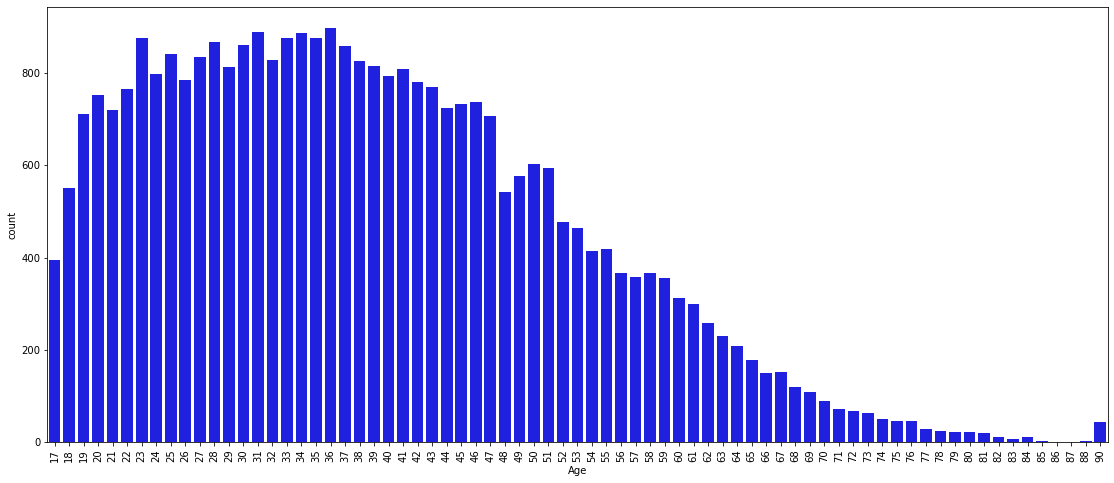



The countplot for the attribute Workclass is-
 AxesSubplot(0.125,0.125;0.775x0.755)


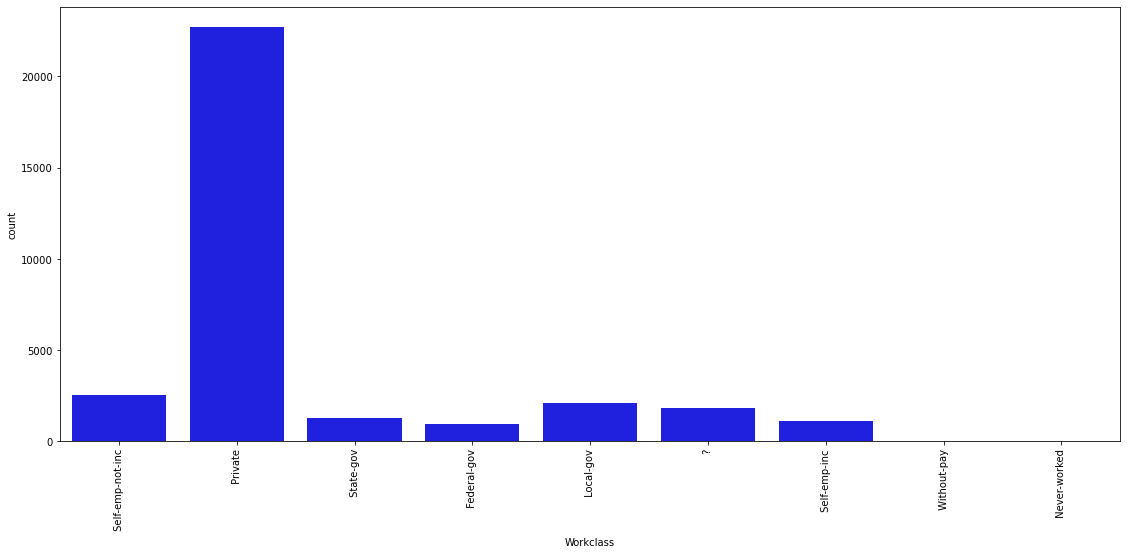



The countplot for the attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


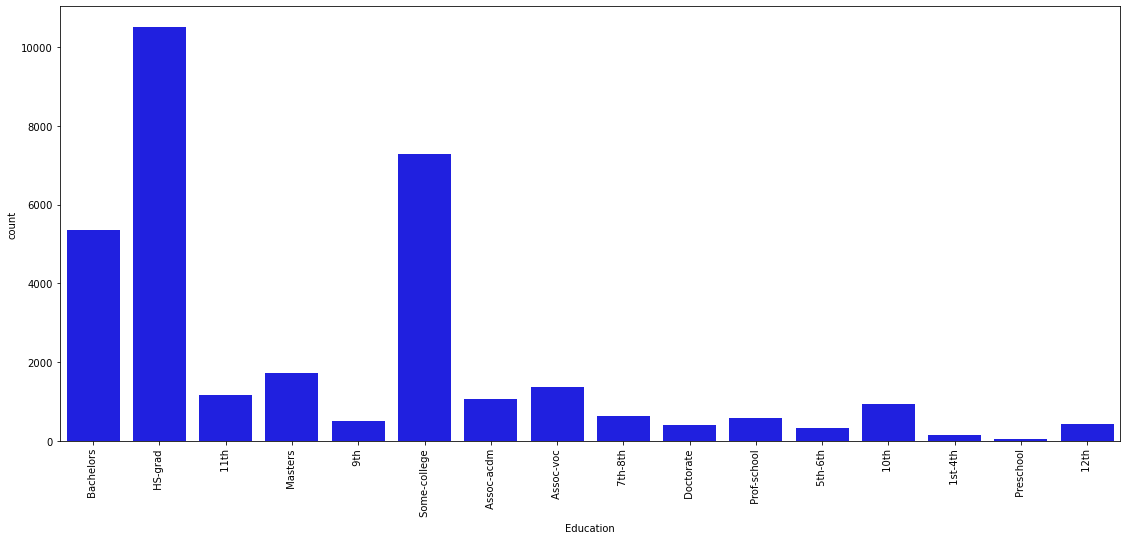



The countplot for the attribute Education_num is-
 AxesSubplot(0.125,0.125;0.775x0.755)


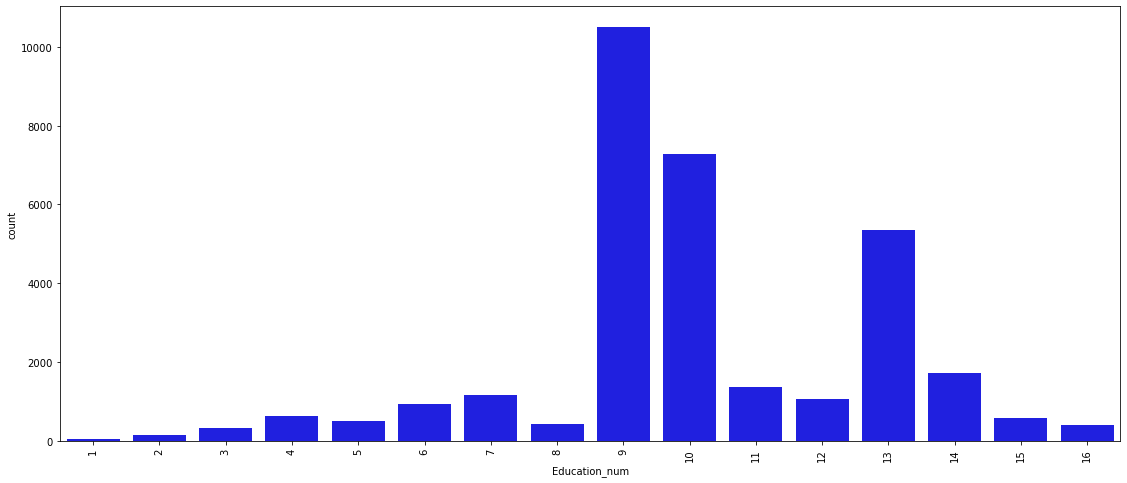



The countplot for the attribute Marital_status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


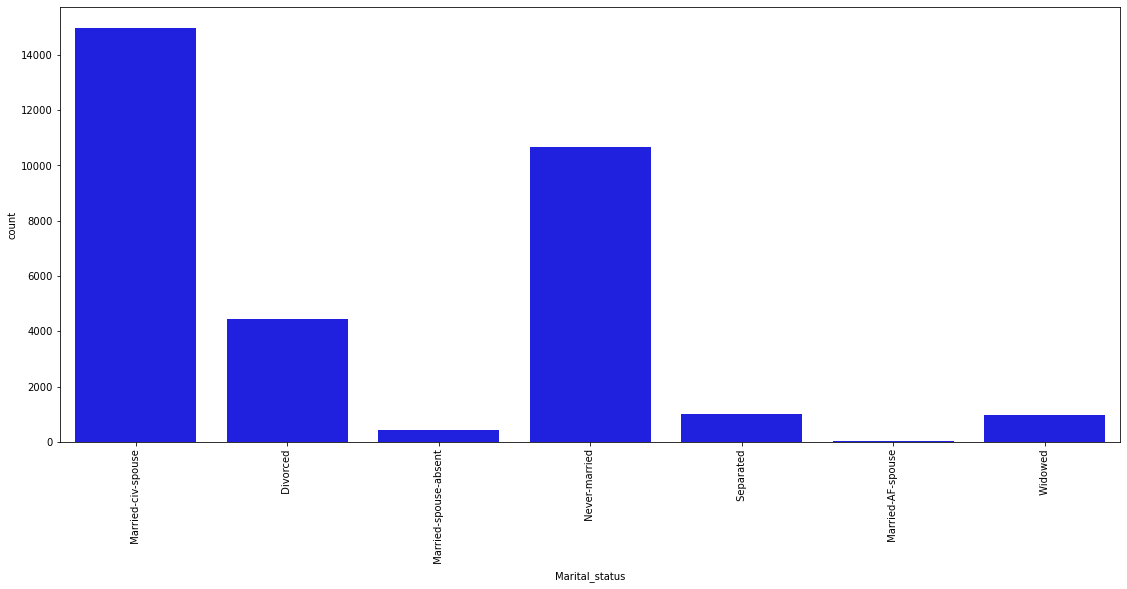



The countplot for the attribute Occupation is-
 AxesSubplot(0.125,0.125;0.775x0.755)


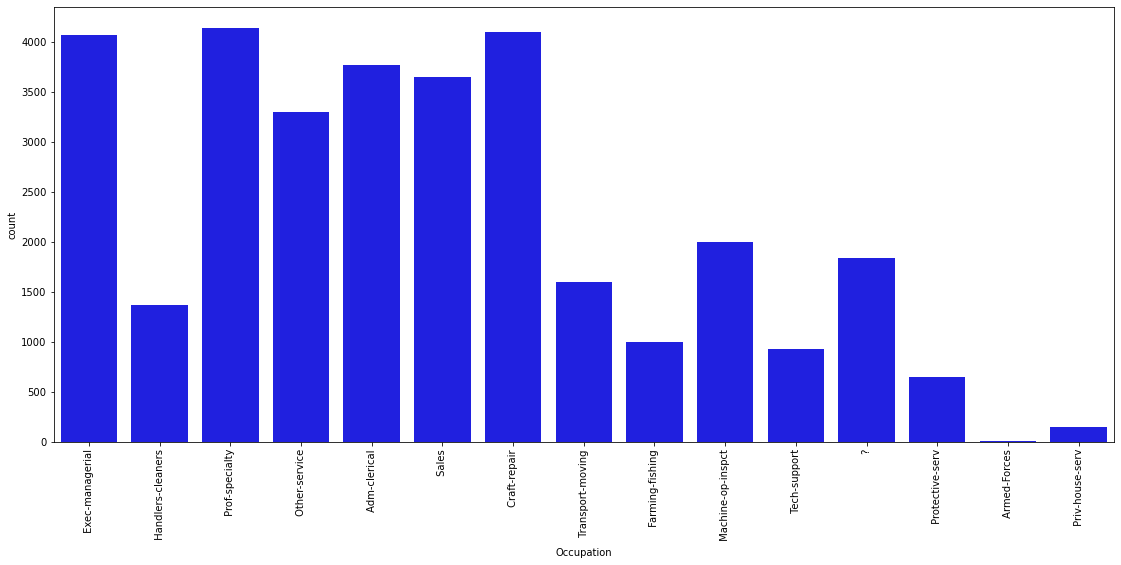



The countplot for the attribute Relationship is-
 AxesSubplot(0.125,0.125;0.775x0.755)


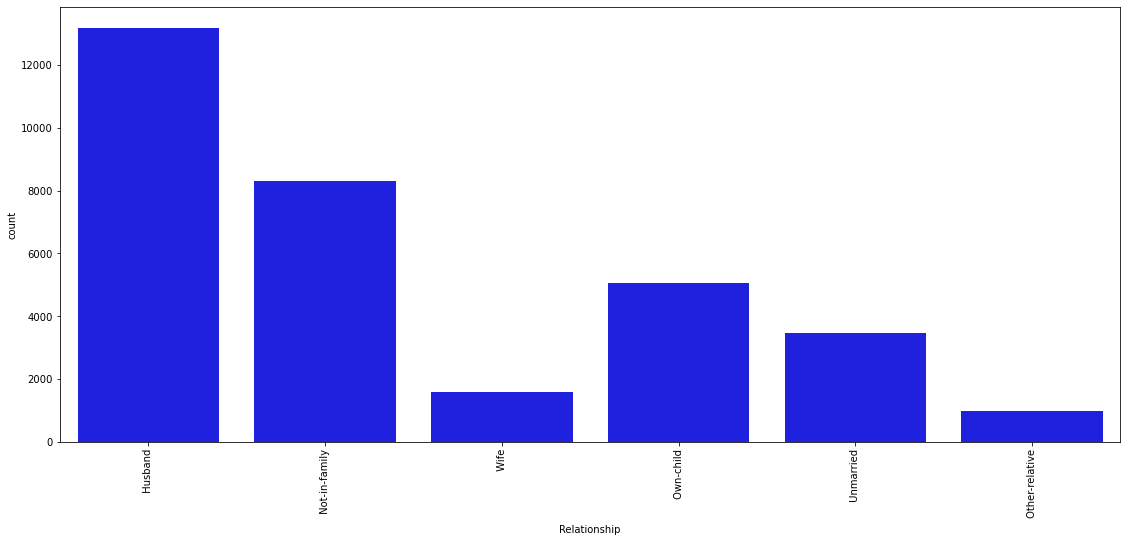



The countplot for the attribute Race is-
 AxesSubplot(0.125,0.125;0.775x0.755)


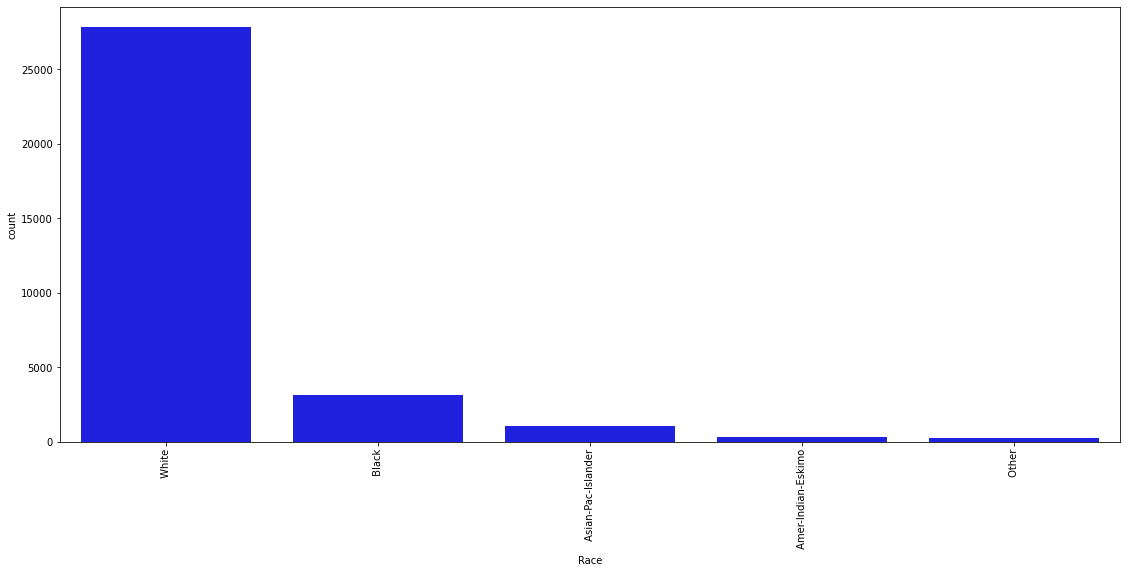



The countplot for the attribute Sex is-
 AxesSubplot(0.125,0.125;0.775x0.755)


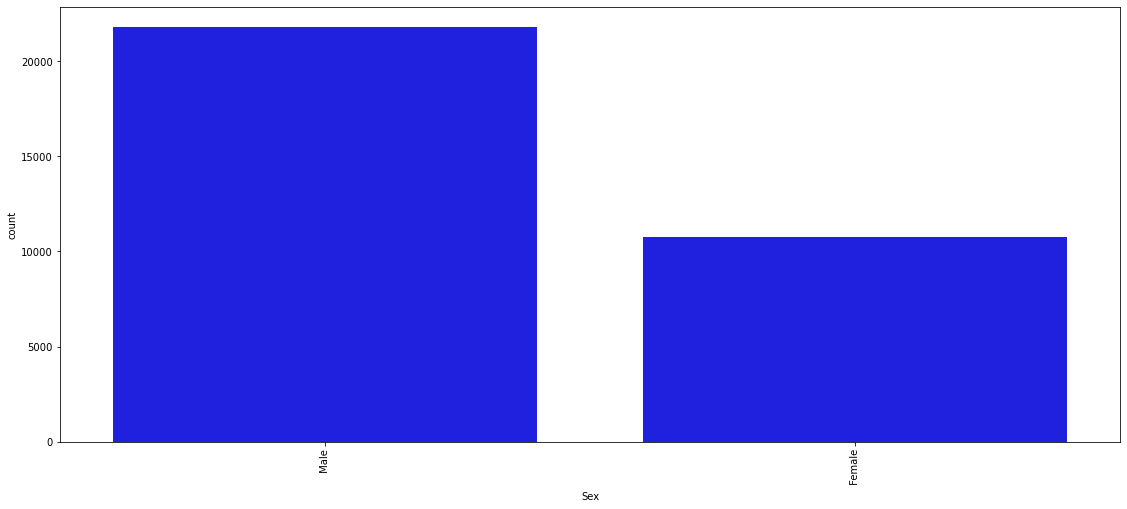



The countplot for the attribute Native_country is-
 AxesSubplot(0.125,0.125;0.775x0.755)


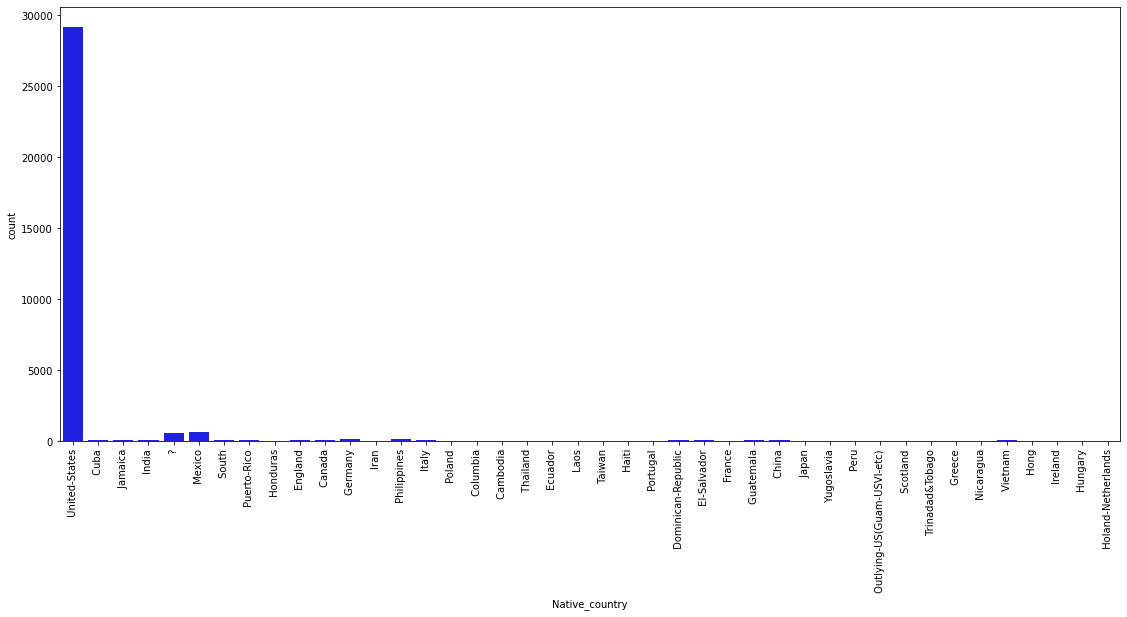



The countplot for the attribute Income is-
 AxesSubplot(0.125,0.125;0.775x0.755)


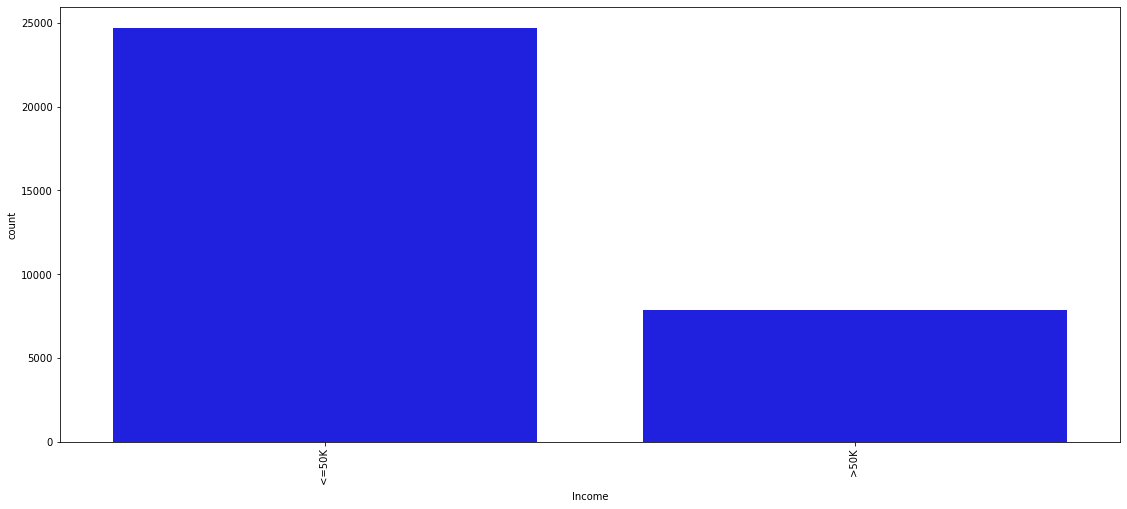

In [47]:
for i in df.columns.drop(['Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']):
    plt.figure(figsize=(19,8))
    print(f'The countplot for the attribute {i} is-\n {sns.countplot(df[i],color="BLUE")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

#### This plot basically do the counting of each unique values.

1.Most of the person are in b/w Age (22-36 Years).

2.More than 20000 people are doing private jobs

3.More than 10000 people are HS-graduate which is highest among the education group.

4.More than 14000 people are married to a civilian spouse while more than 1000 people are never married i.e. not now or previously married

5.More than 4000 people are doing their jobs as a Professor,Excecutive Manager Post and as a craft repair individually

6.More than 12000 people who are working are husband

7.More than 25000 people are white people

8.More than 20000 people are male

9.Approx 30000 people have United States as their native country

10.Approx 25000 people are earning less or equal to 50000 as annually

#### 2.Histogram

The Histogram Plot for the attribute Age is-
 AxesSubplot(0.125,0.125;0.775x0.755)


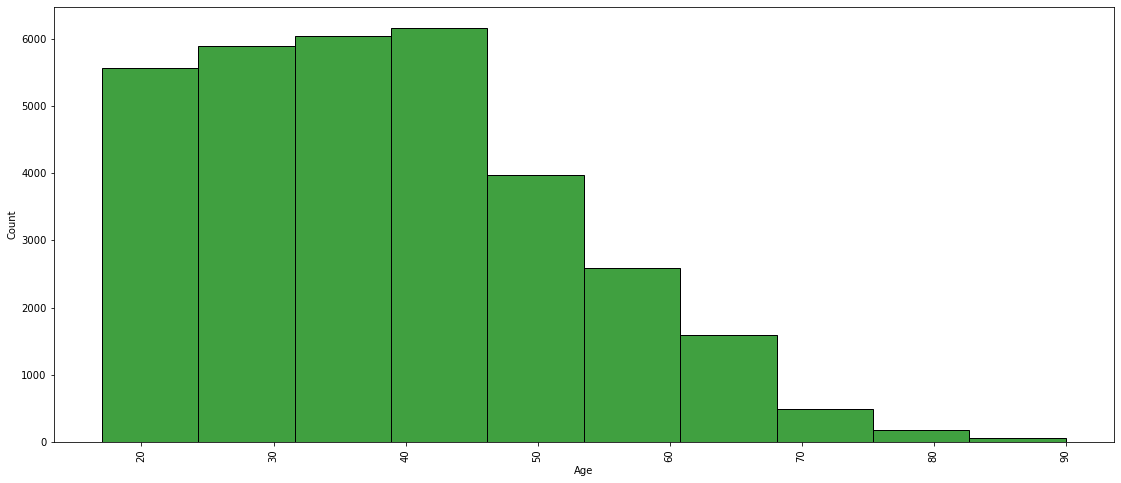



The Histogram Plot for the attribute Workclass is-
 AxesSubplot(0.125,0.125;0.775x0.755)


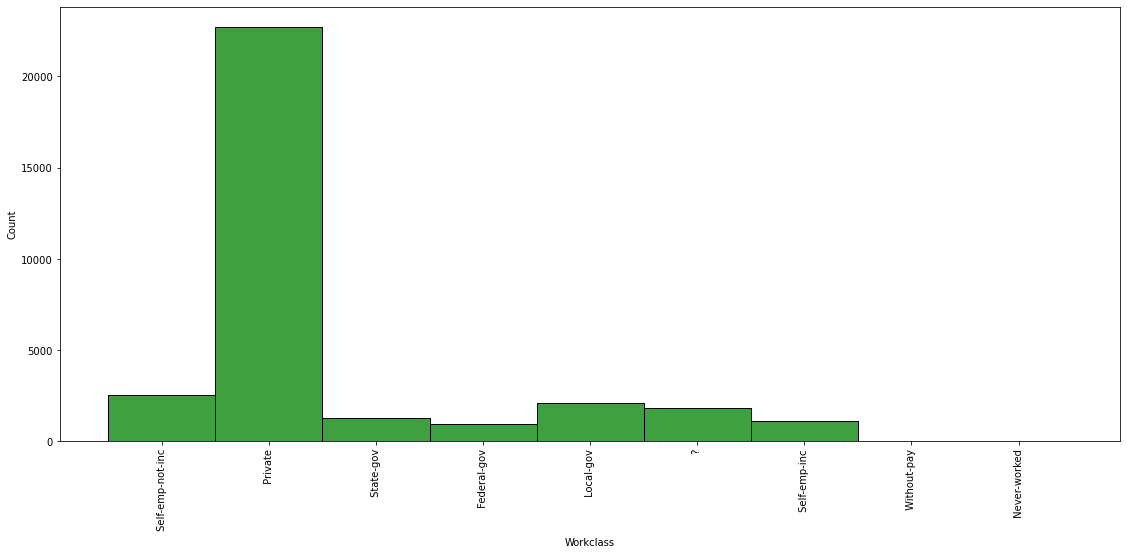



The Histogram Plot for the attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


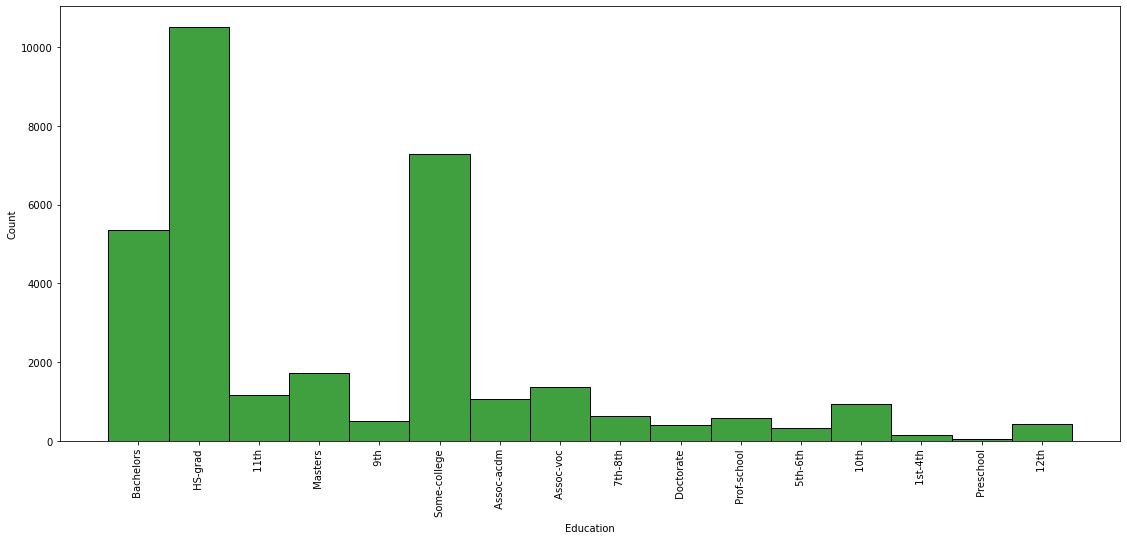



The Histogram Plot for the attribute Education_num is-
 AxesSubplot(0.125,0.125;0.775x0.755)


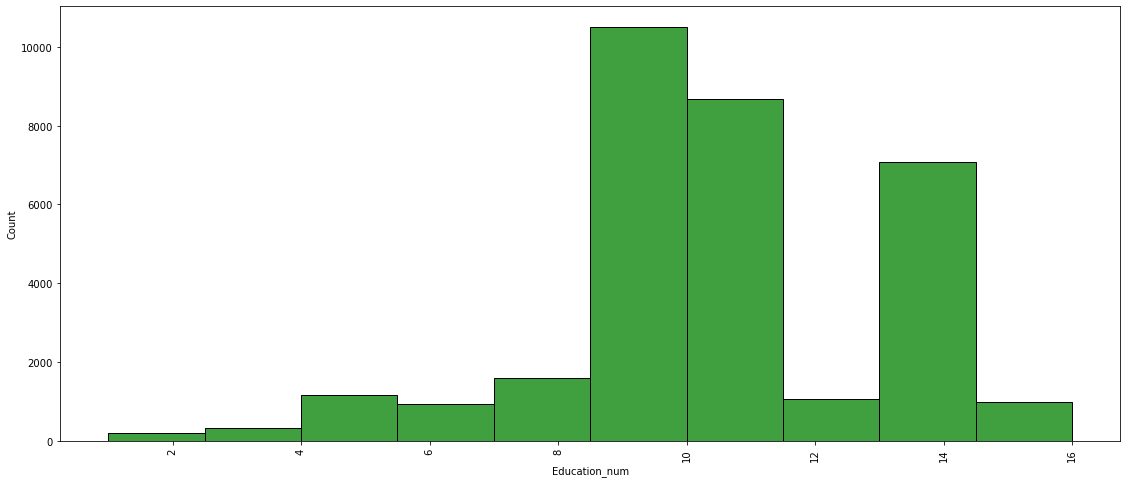



The Histogram Plot for the attribute Marital_status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


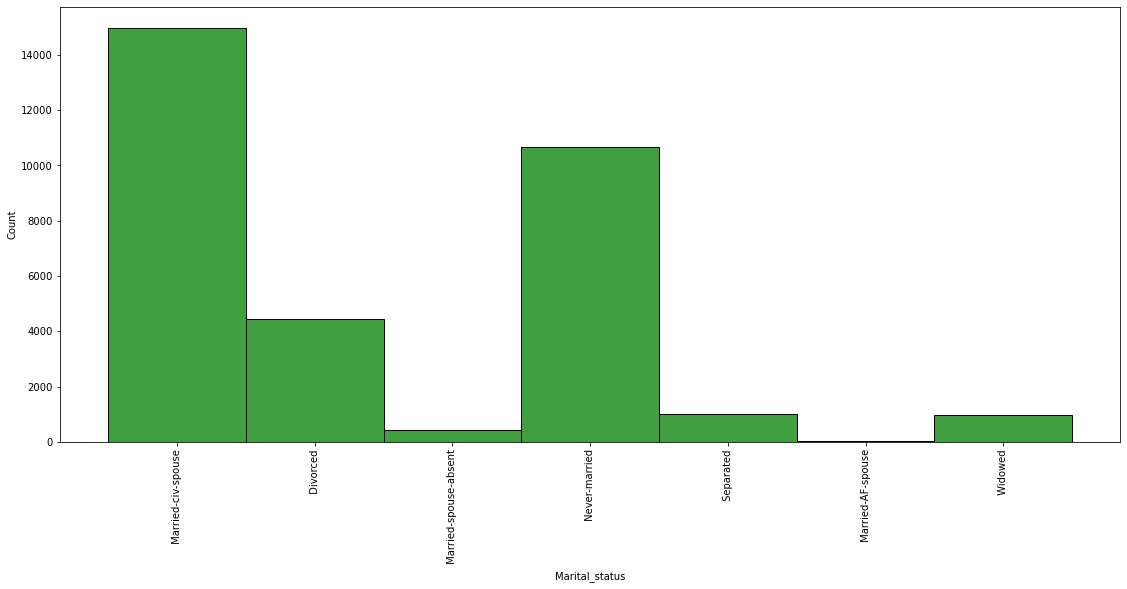



The Histogram Plot for the attribute Occupation is-
 AxesSubplot(0.125,0.125;0.775x0.755)


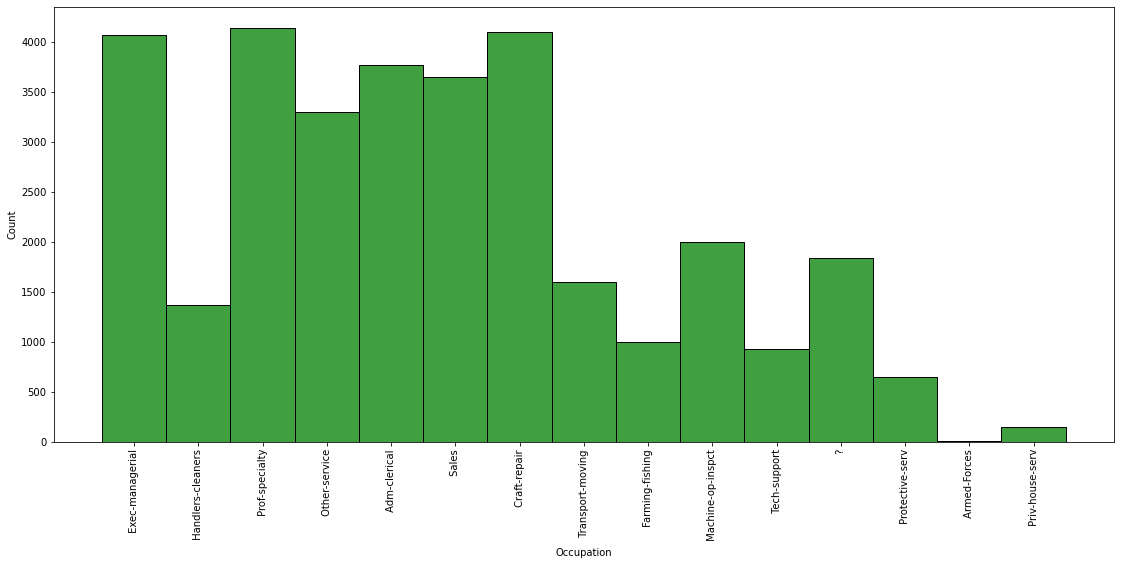



The Histogram Plot for the attribute Relationship is-
 AxesSubplot(0.125,0.125;0.775x0.755)


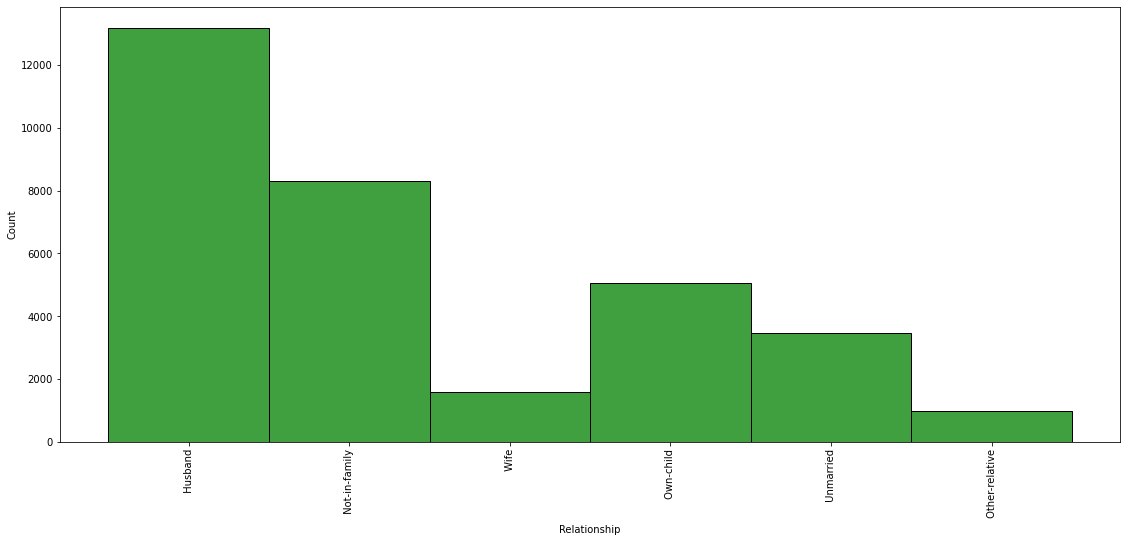



The Histogram Plot for the attribute Race is-
 AxesSubplot(0.125,0.125;0.775x0.755)


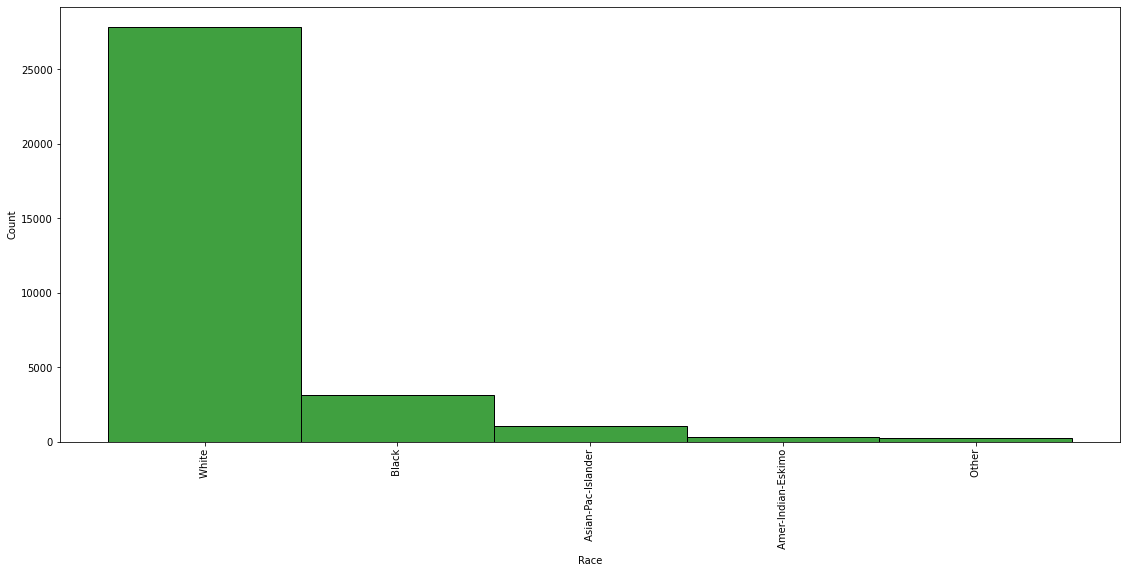



The Histogram Plot for the attribute Sex is-
 AxesSubplot(0.125,0.125;0.775x0.755)


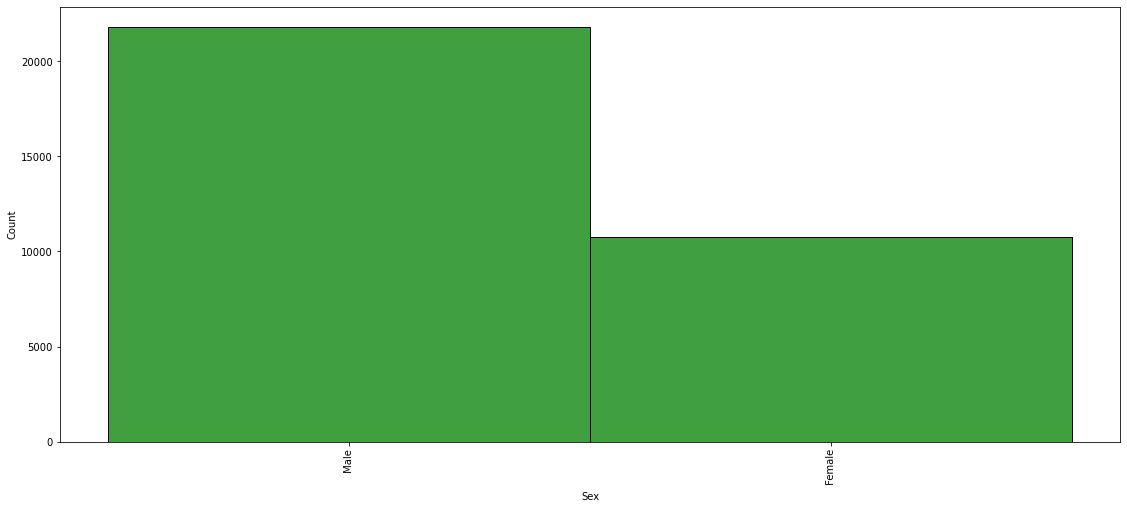



The Histogram Plot for the attribute Native_country is-
 AxesSubplot(0.125,0.125;0.775x0.755)


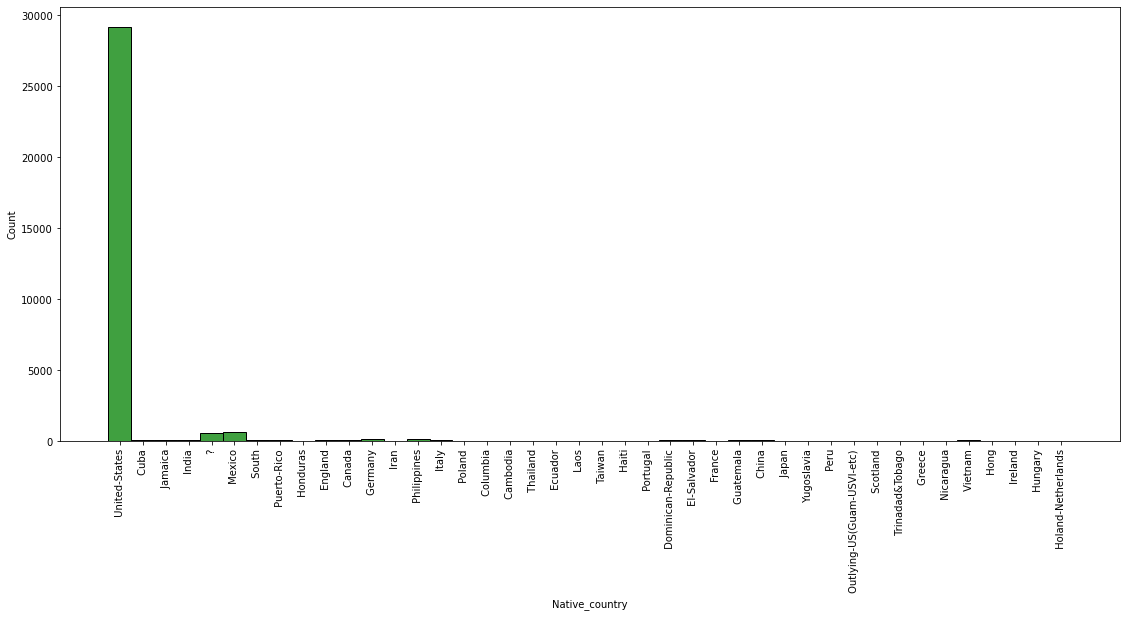



The Histogram Plot for the attribute Income is-
 AxesSubplot(0.125,0.125;0.775x0.755)


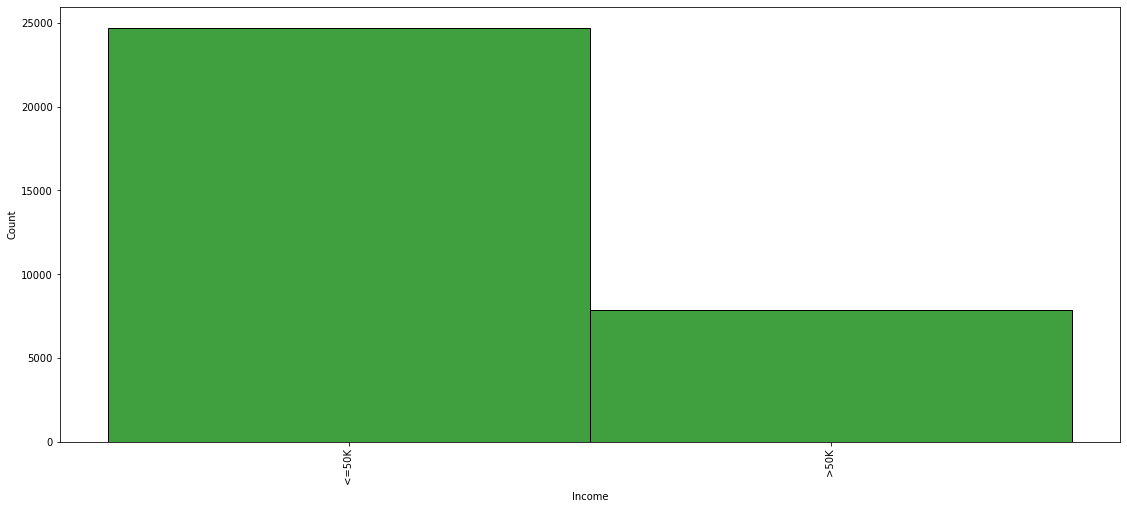

In [49]:
for i in df.columns.drop(['Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']):
    plt.figure(figsize=(19,8))
    print(f'The Histogram Plot for the attribute {i} is-\n {sns.histplot(df[i],color="green",bins=10)}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

B/w age 40-50 approx 6000 people are working

#### 3.Scatterplot

The Scatter Plot for the attribute "Income" & "Age" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


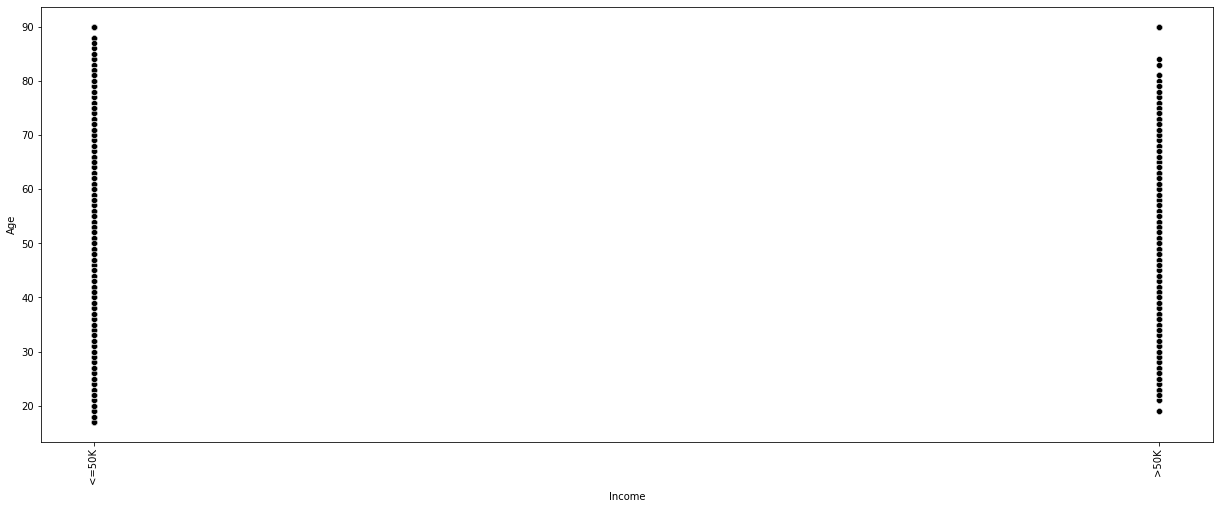



The Scatter Plot for the attribute "Income" & "Workclass" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


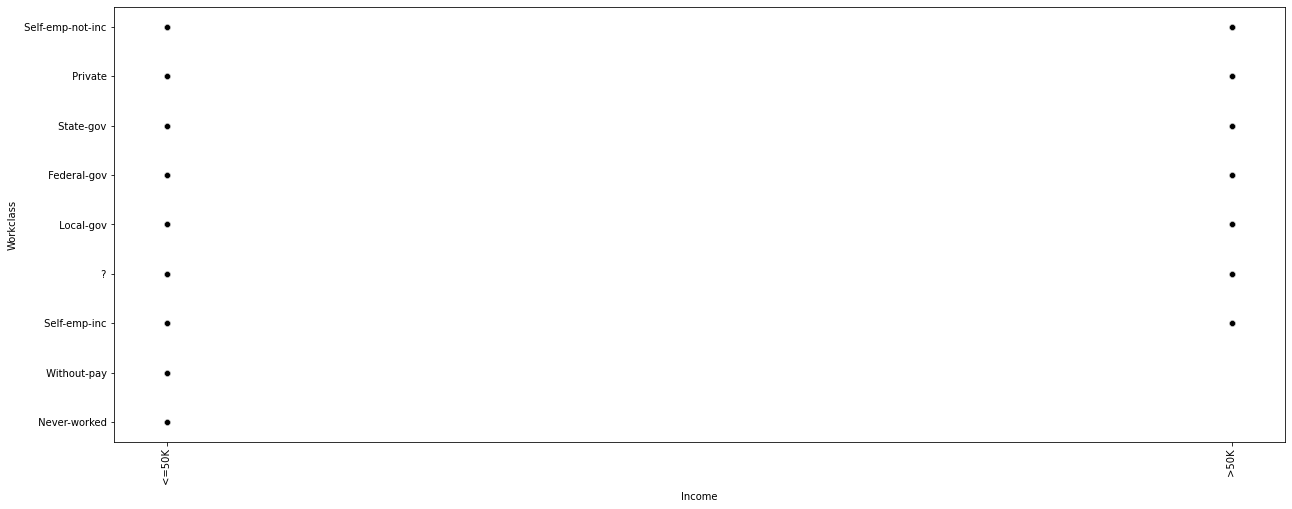



The Scatter Plot for the attribute "Income" & "Fnlwgt" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


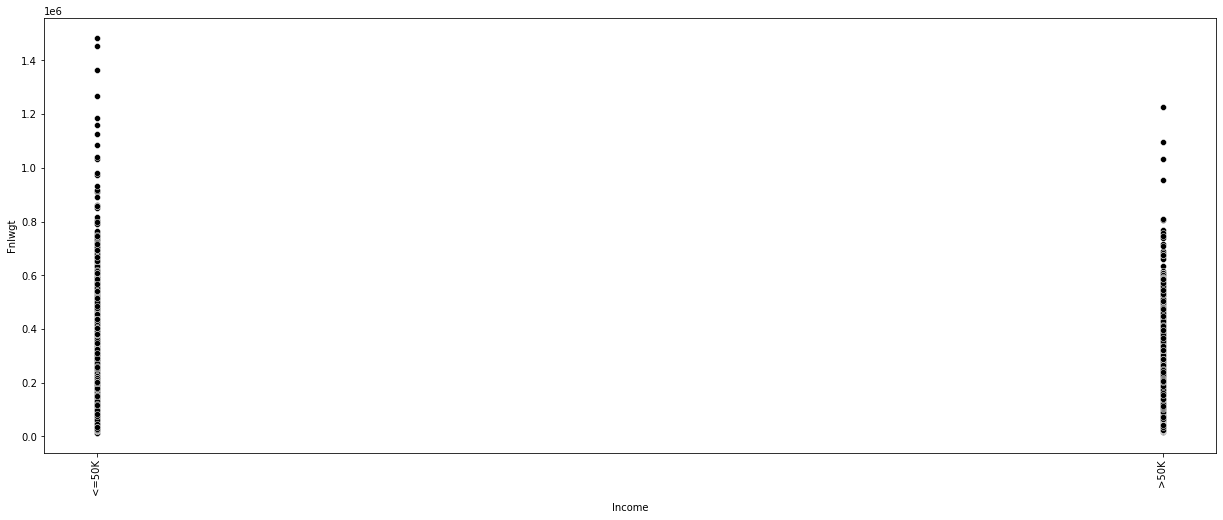



The Scatter Plot for the attribute "Income" & "Education" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


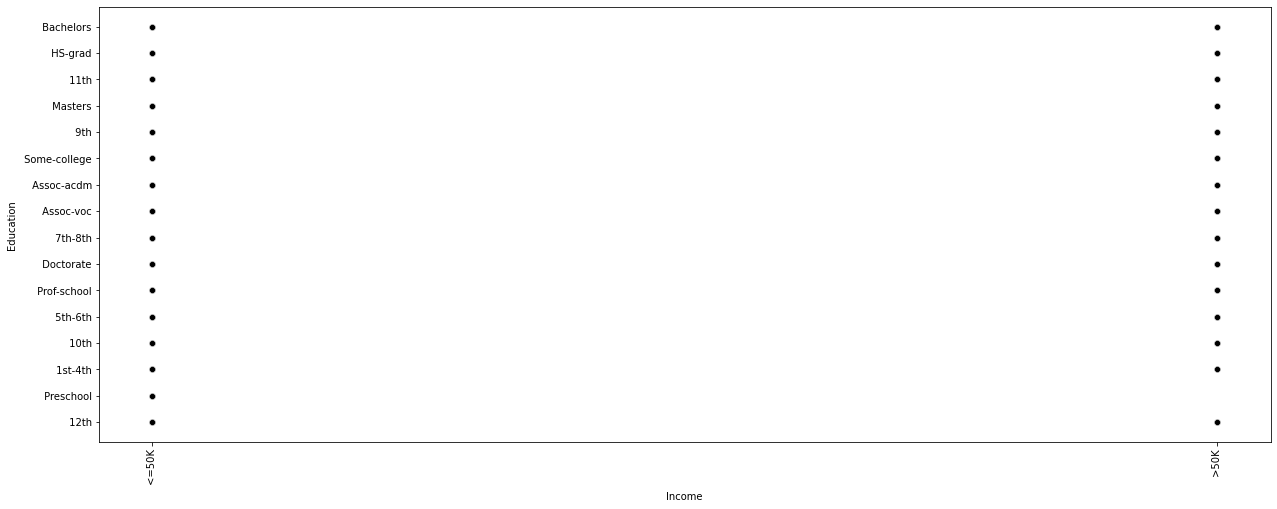



The Scatter Plot for the attribute "Income" & "Education_num" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


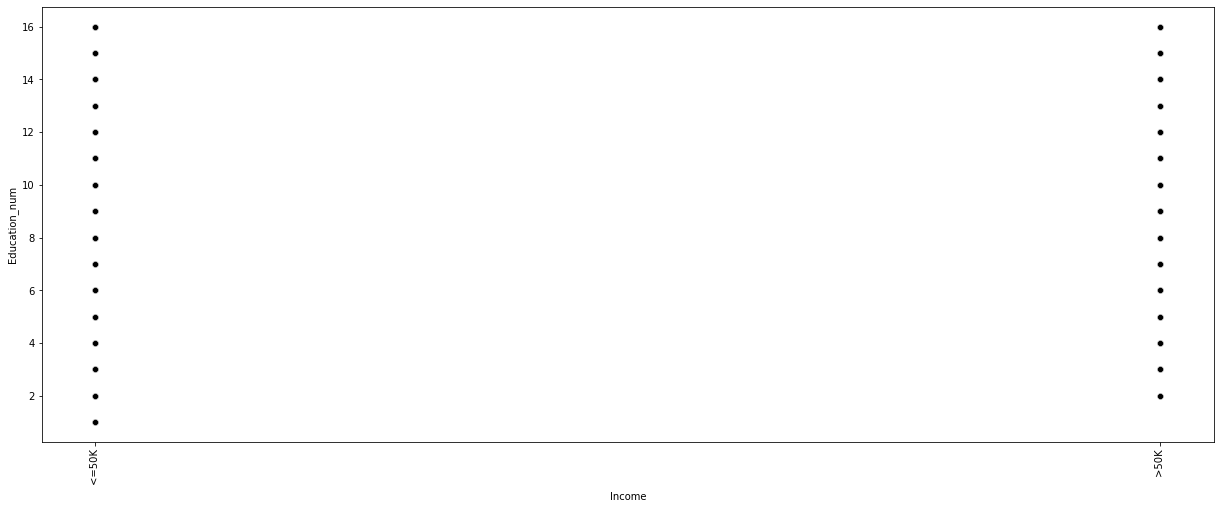



The Scatter Plot for the attribute "Income" & "Marital_status" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


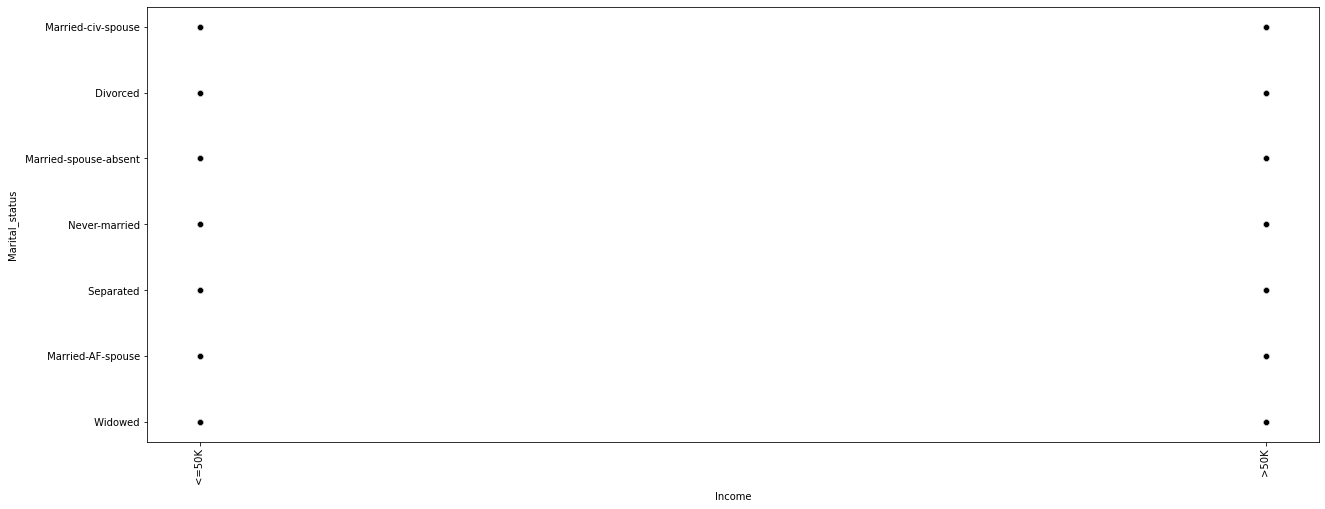



The Scatter Plot for the attribute "Income" & "Occupation" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


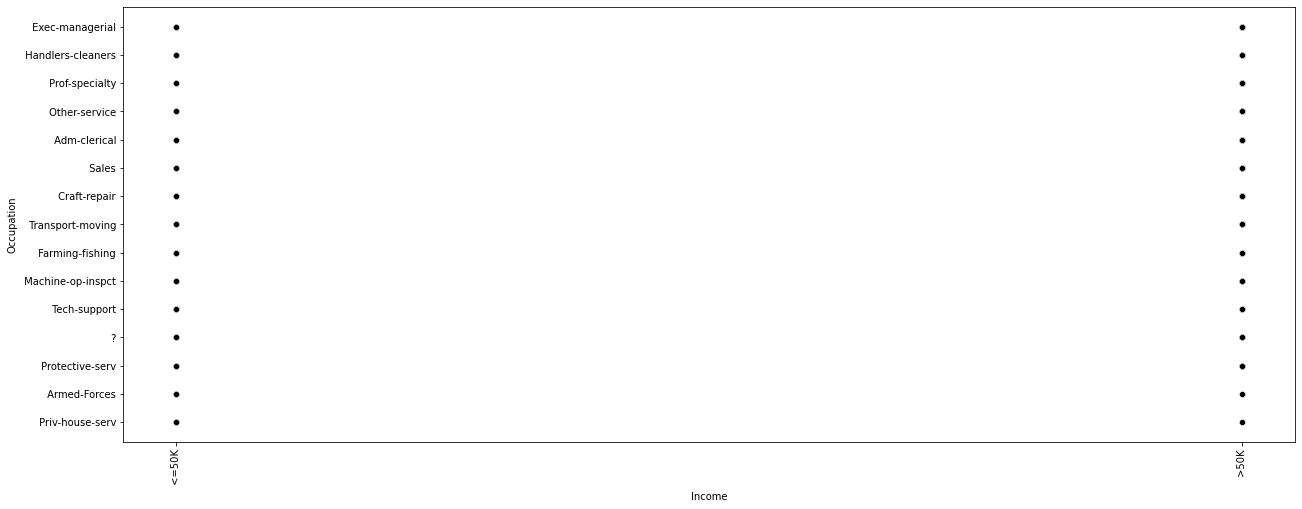



The Scatter Plot for the attribute "Income" & "Relationship" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


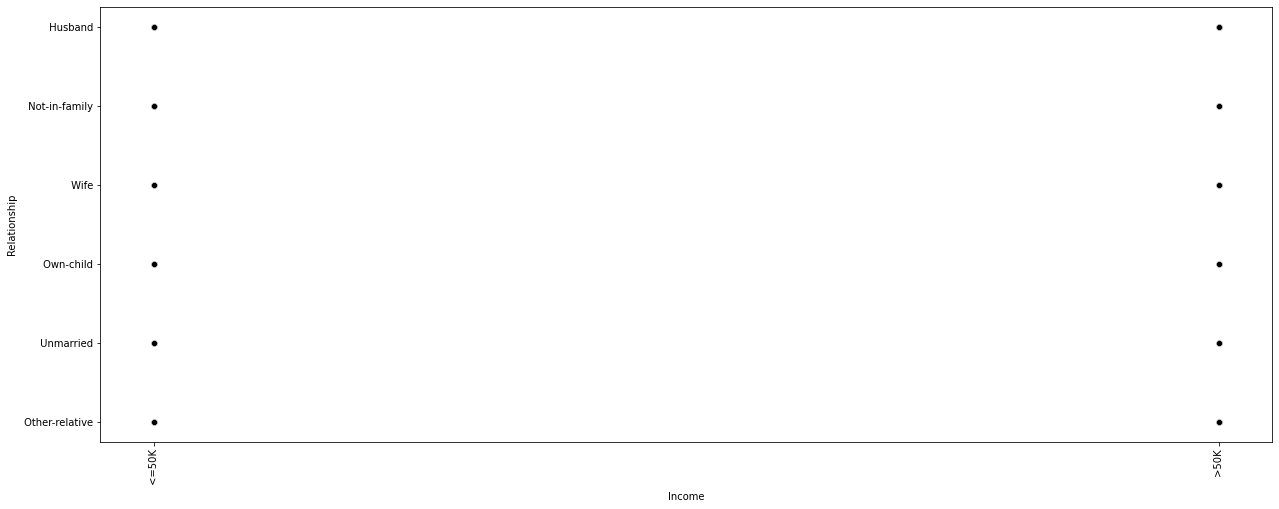



The Scatter Plot for the attribute "Income" & "Race" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


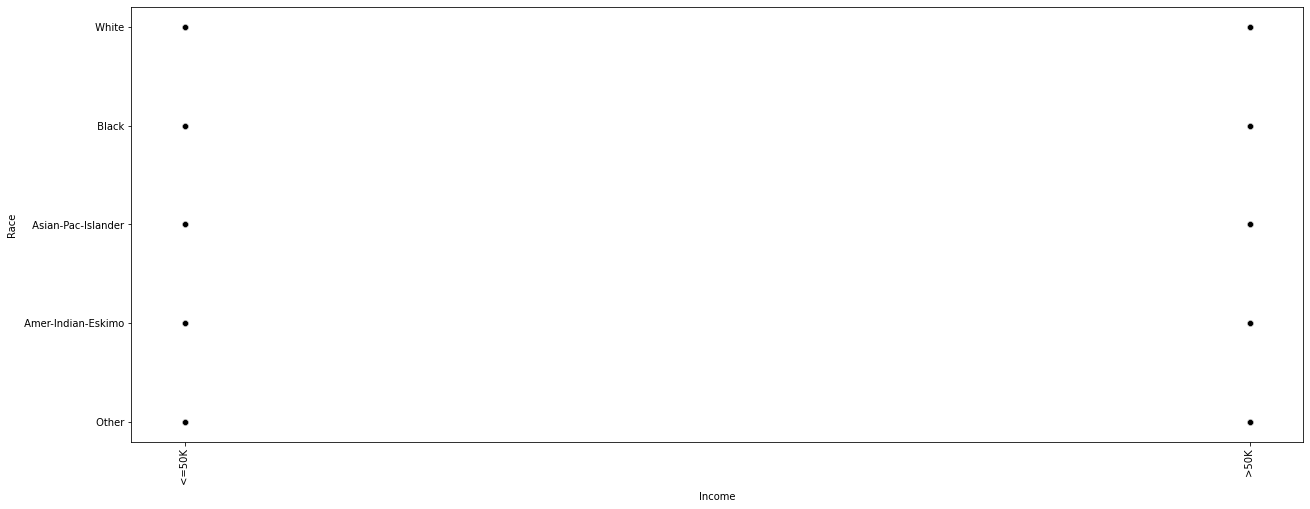



The Scatter Plot for the attribute "Income" & "Sex" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


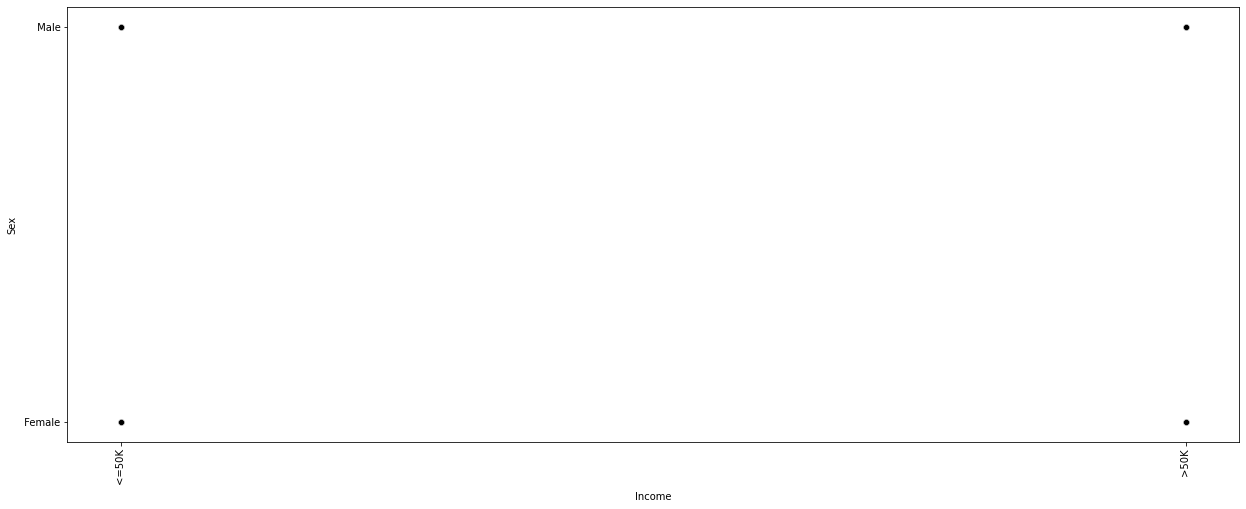



The Scatter Plot for the attribute "Income" & "Capital_gain" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


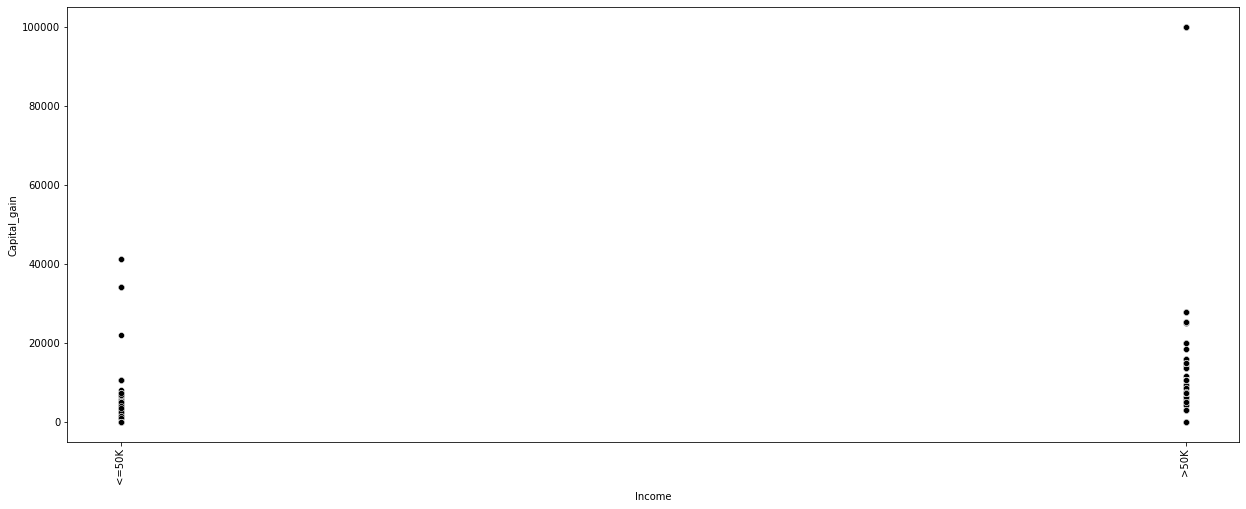



The Scatter Plot for the attribute "Income" & "Capital_loss" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


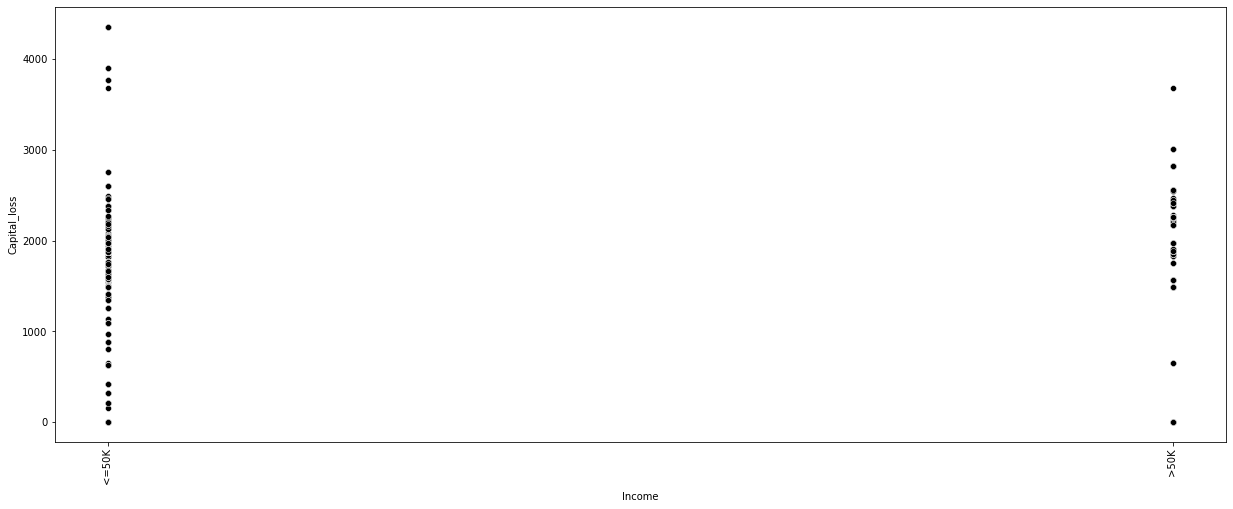



The Scatter Plot for the attribute "Income" & "Hours_per_week" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


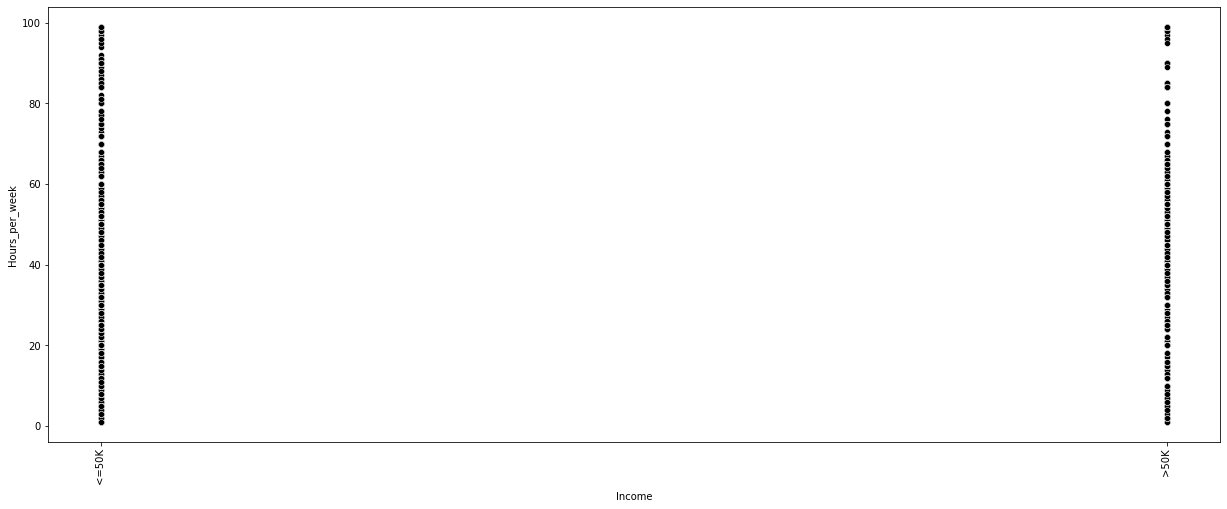



The Scatter Plot for the attribute "Income" & "Native_country" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


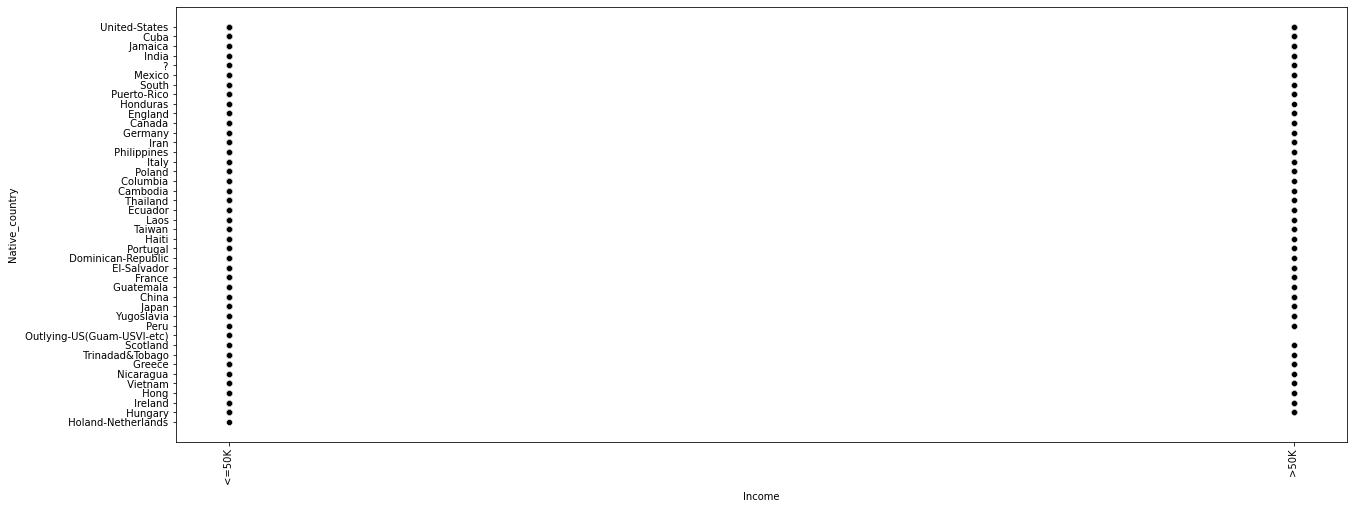



The Scatter Plot for the attribute "Income" & "Income" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


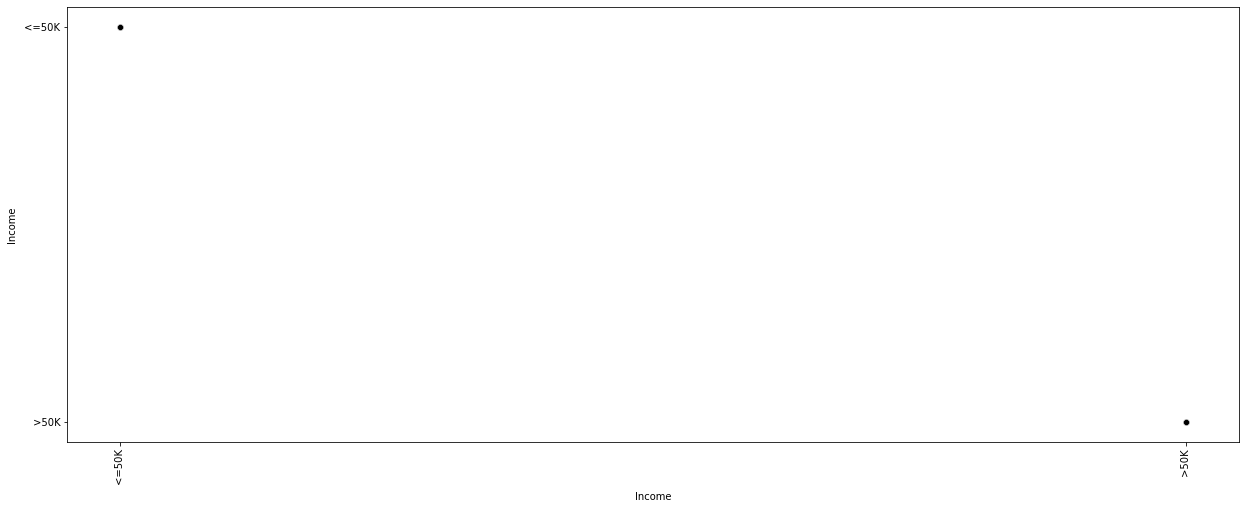

In [54]:
for i in df.columns:
    plt.figure(figsize=(21,8))
    print(f'The Scatter Plot for the attribute "Income" & "{i}" is-\n {sns.scatterplot(df.Income,df[i],color="black")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

The datapoints of feature variables are almost equally distributed in each cases w.r.t. all 'Target variable -Income'

#### 4.Lineplot

The Line Plot for the attribute "Income" & "Age" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


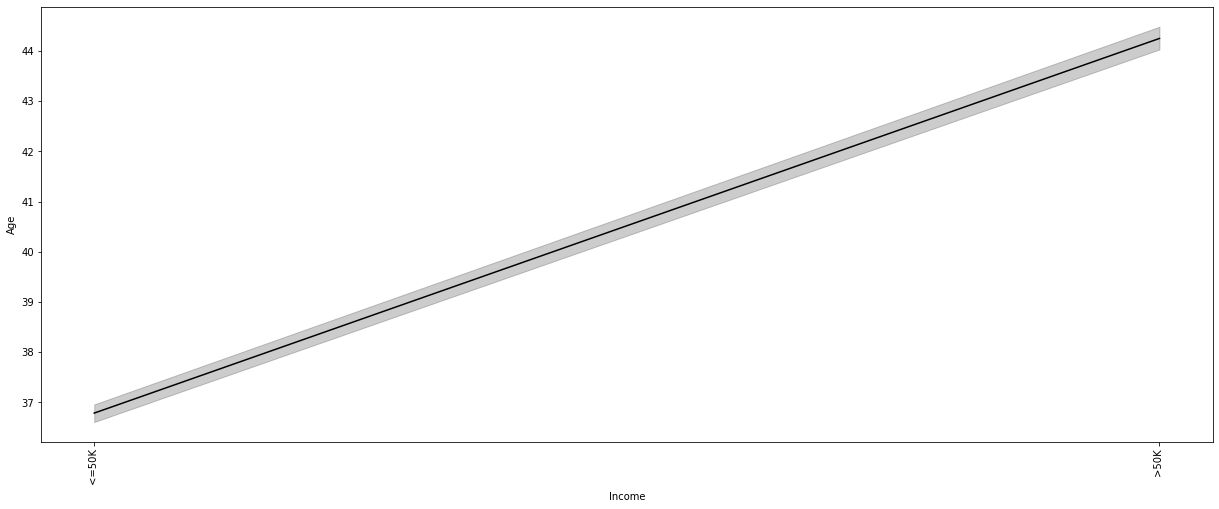



The Line Plot for the attribute "Income" & "Workclass" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


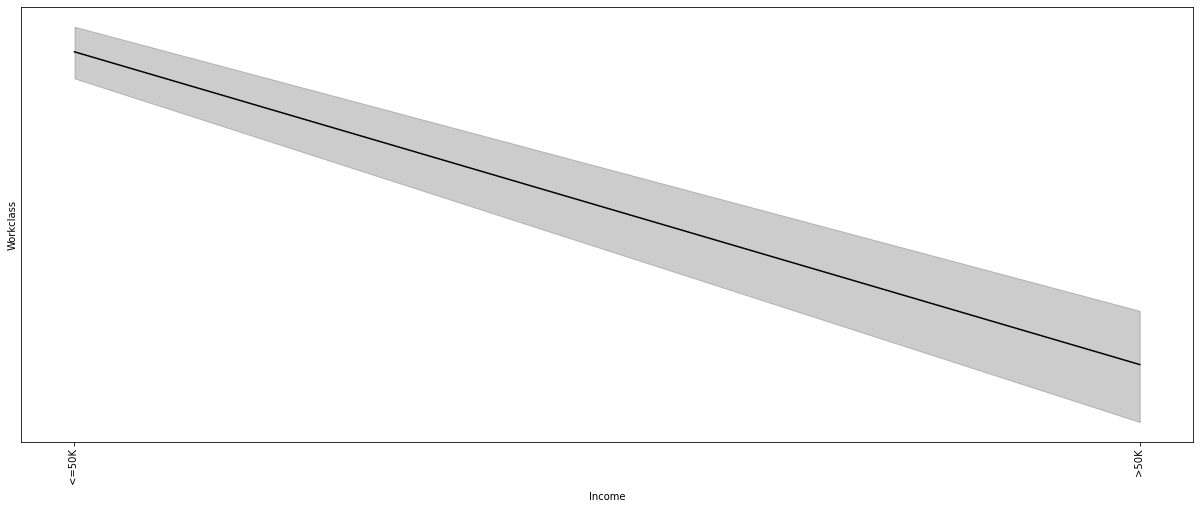



The Line Plot for the attribute "Income" & "Fnlwgt" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


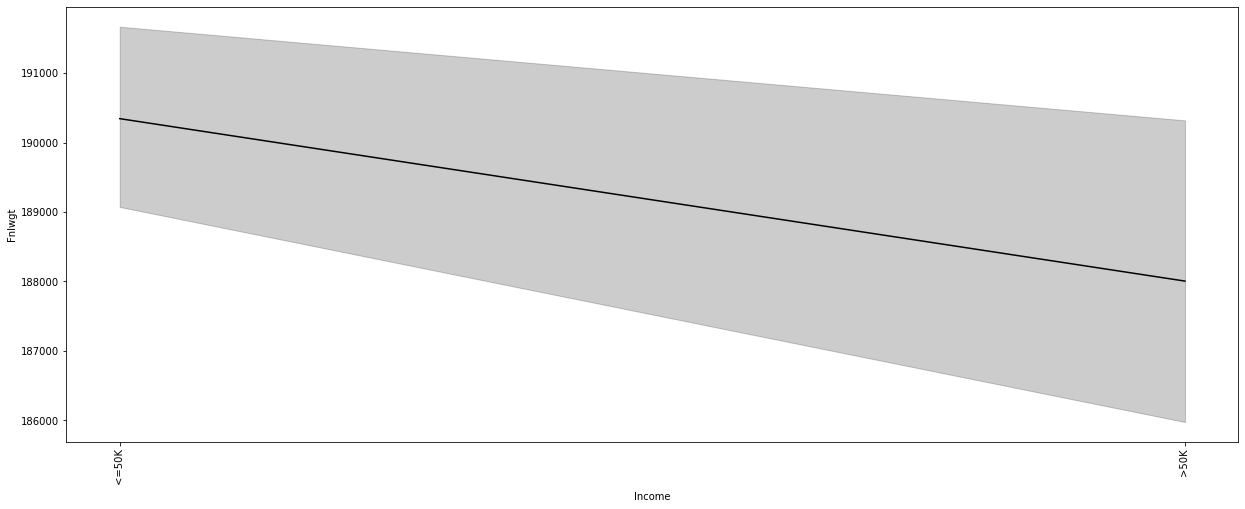



The Line Plot for the attribute "Income" & "Education" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


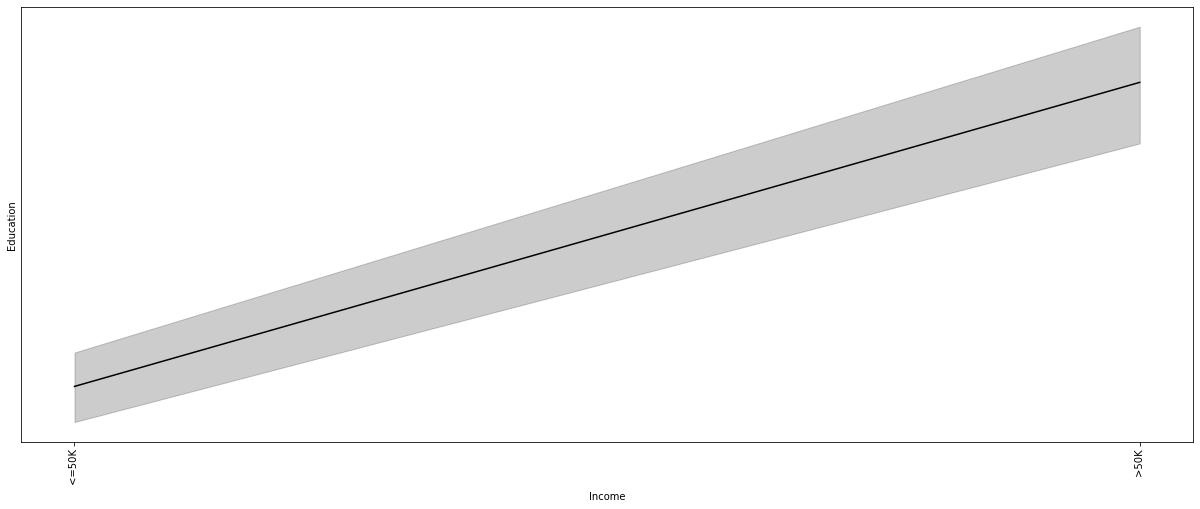



The Line Plot for the attribute "Income" & "Education_num" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


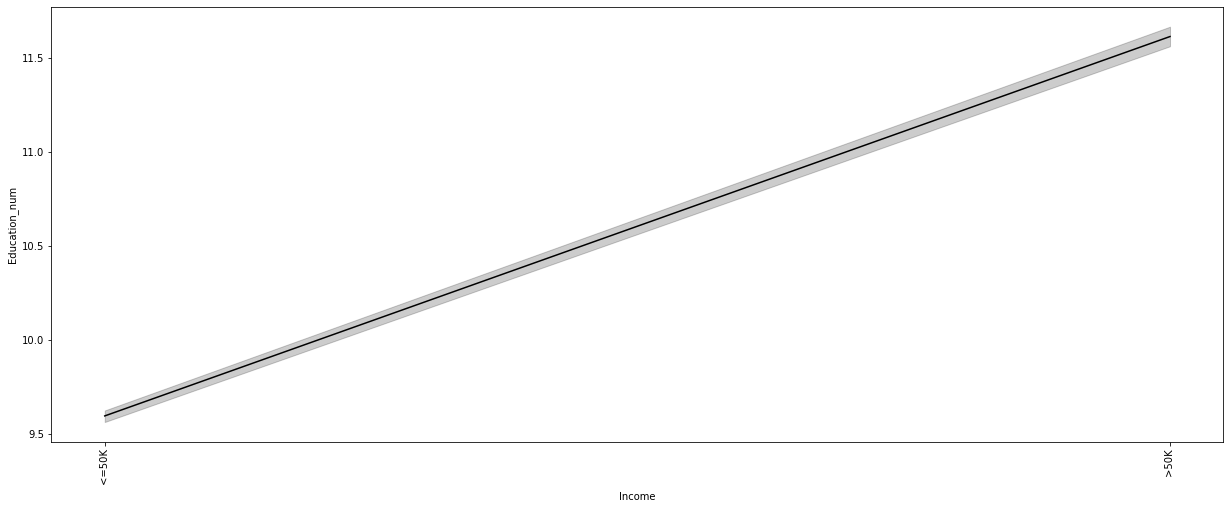



The Line Plot for the attribute "Income" & "Marital_status" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


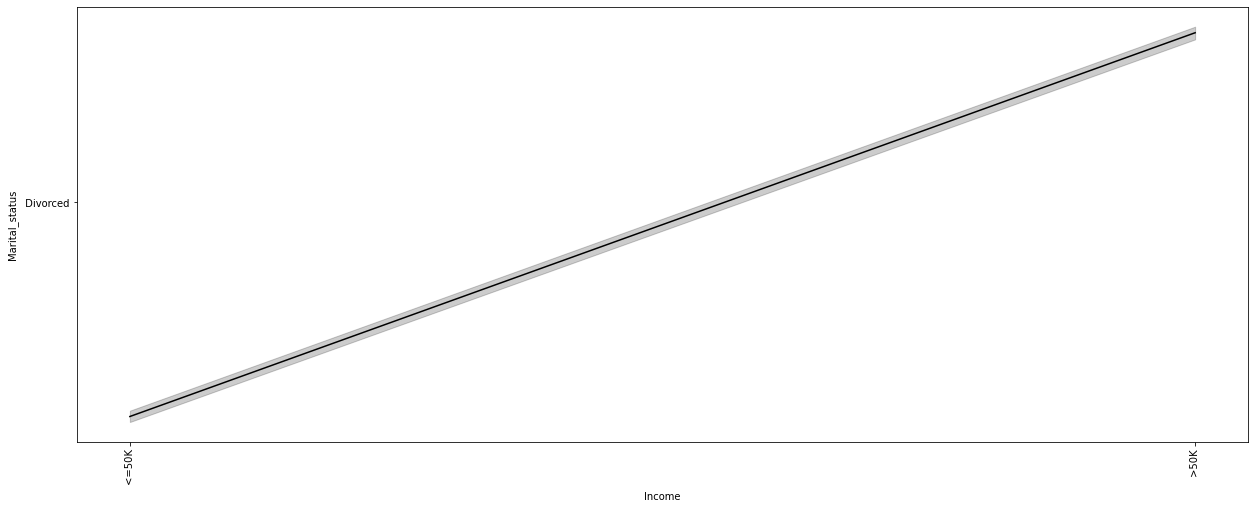



The Line Plot for the attribute "Income" & "Occupation" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


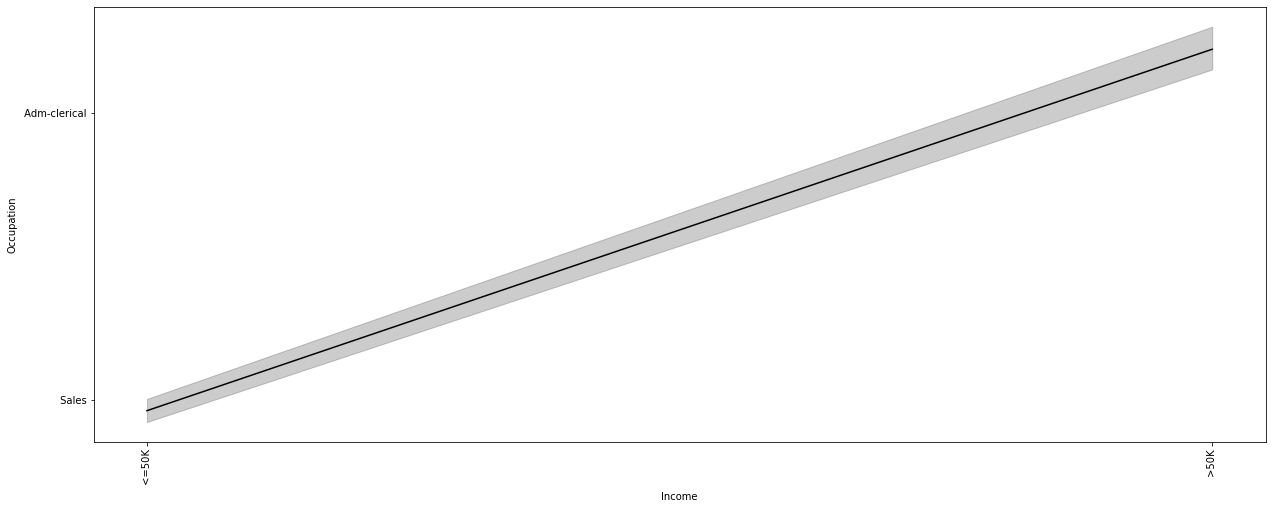



The Line Plot for the attribute "Income" & "Relationship" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


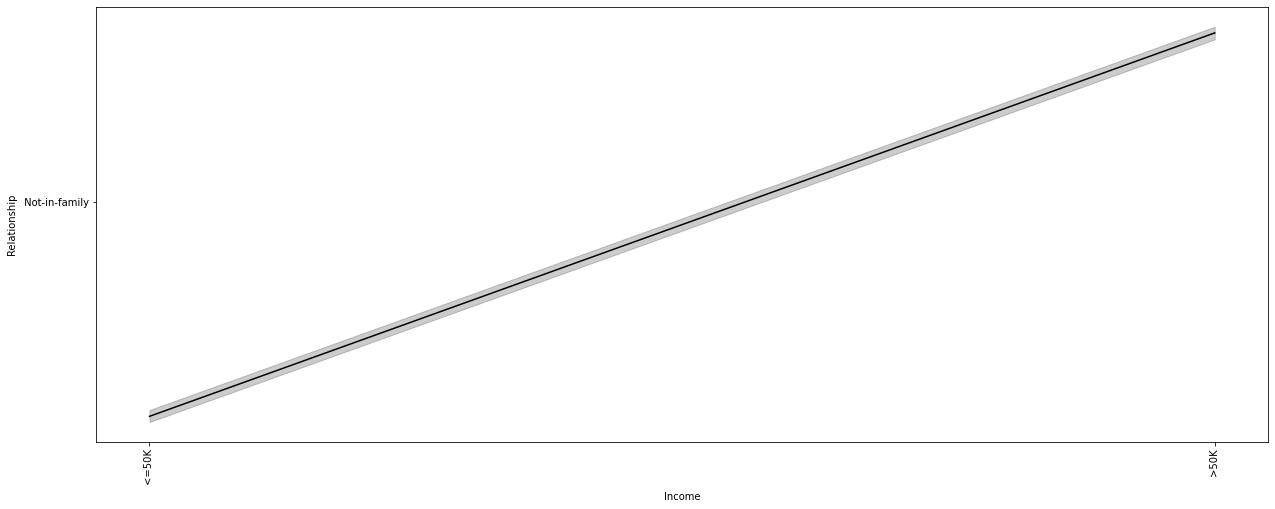



The Line Plot for the attribute "Income" & "Race" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


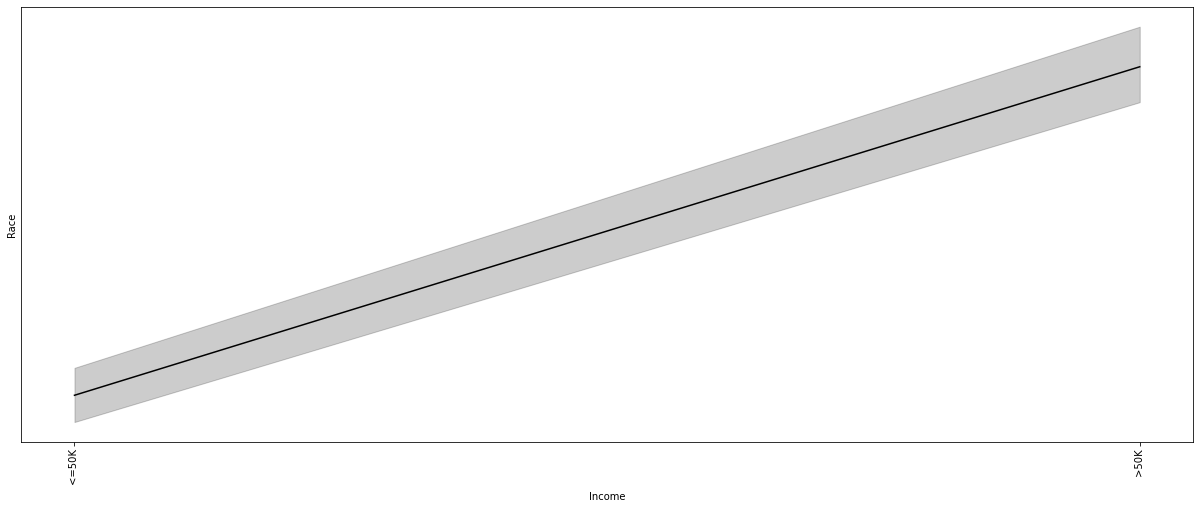



The Line Plot for the attribute "Income" & "Sex" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


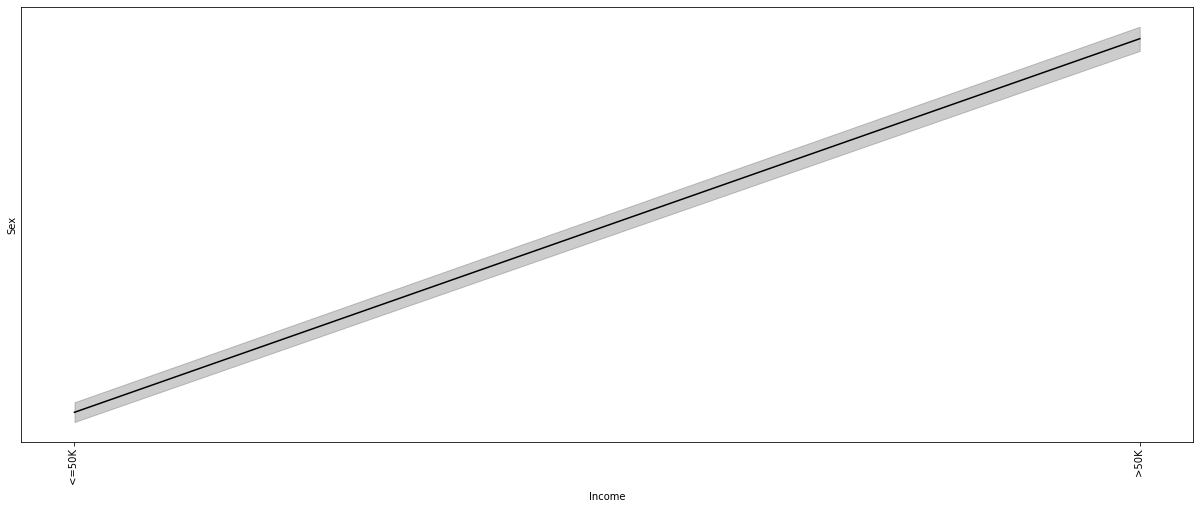



The Line Plot for the attribute "Income" & "Capital_gain" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


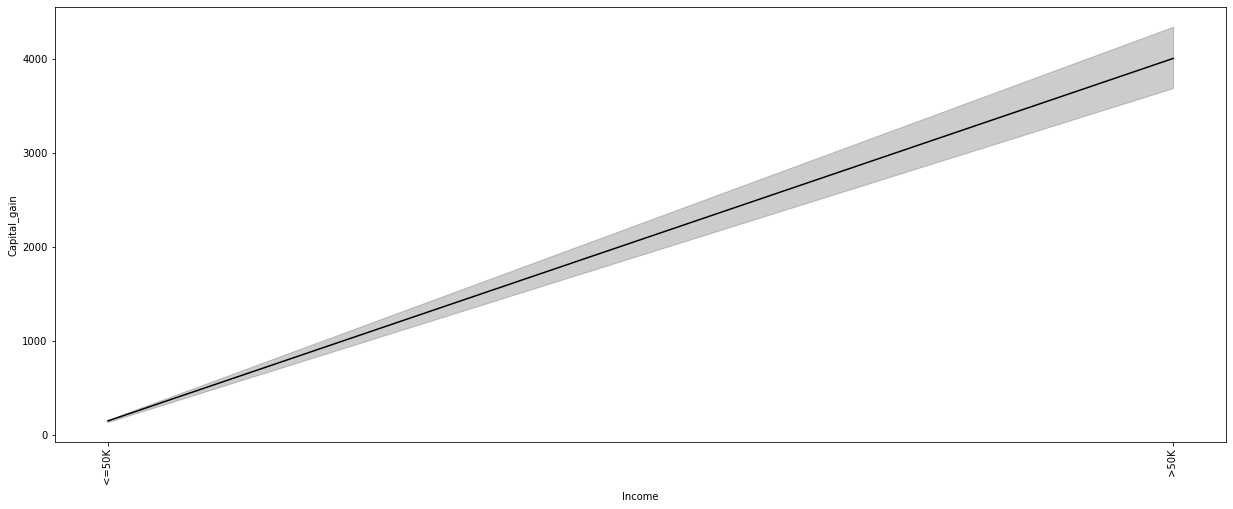



The Line Plot for the attribute "Income" & "Capital_loss" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


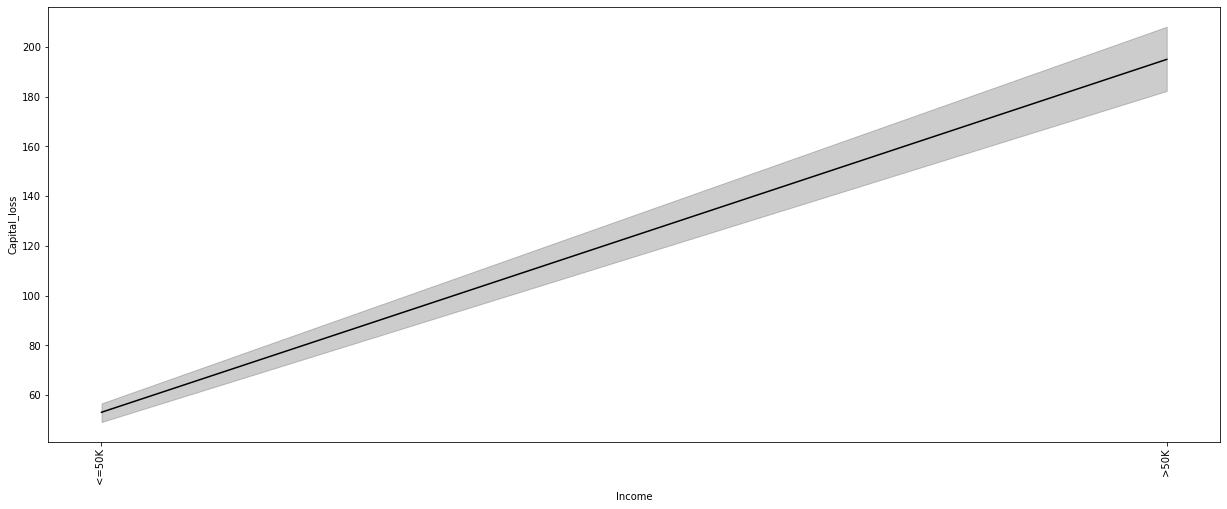



The Line Plot for the attribute "Income" & "Hours_per_week" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


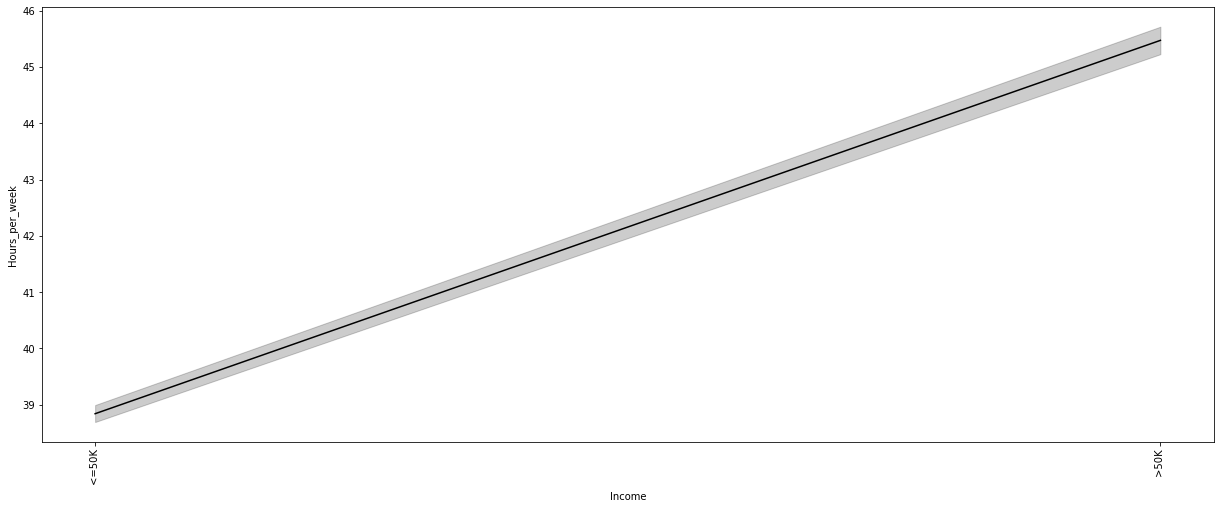



The Line Plot for the attribute "Income" & "Native_country" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


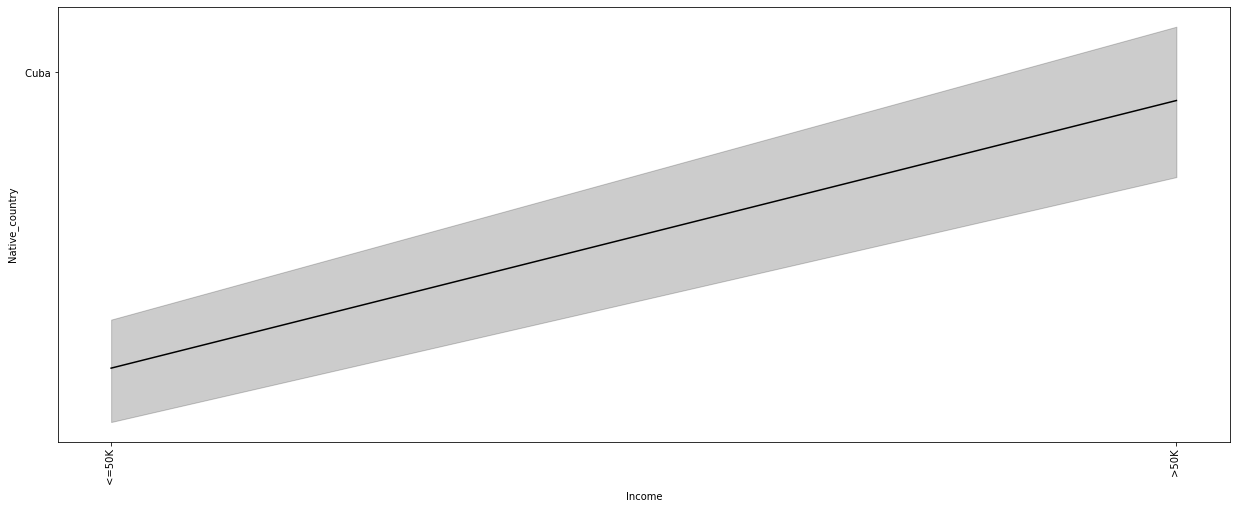



The Line Plot for the attribute "Income" & "Income" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


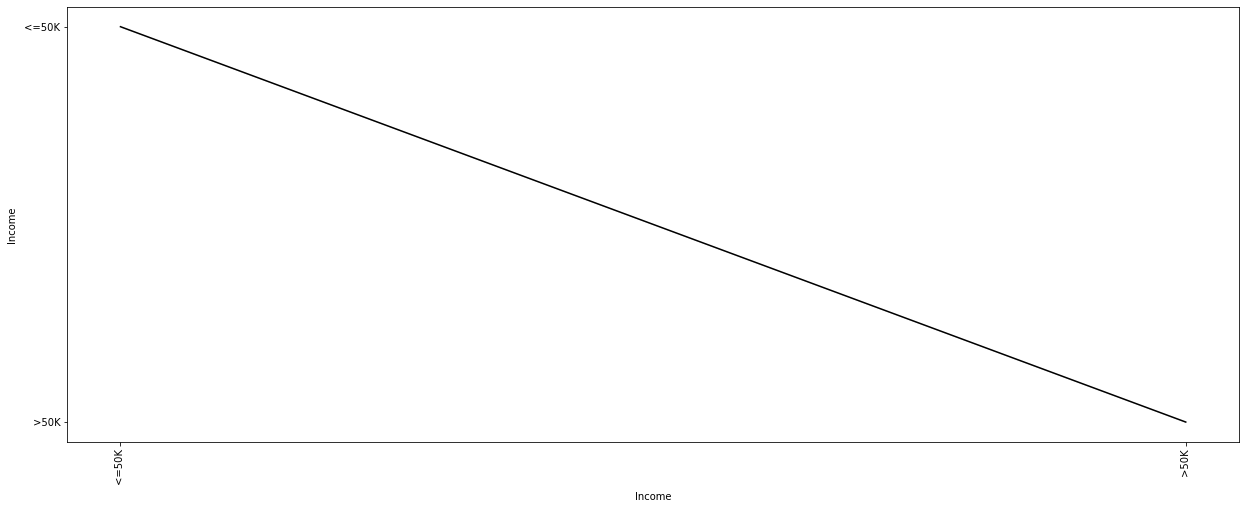

In [55]:
for i in df.columns:
    plt.figure(figsize=(21,8))
    print(f'The Line Plot for the attribute "Income" & "{i}" is-\n {sns.lineplot(df.Income,df[i],color="black")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

#### 5.Categorical Plotting

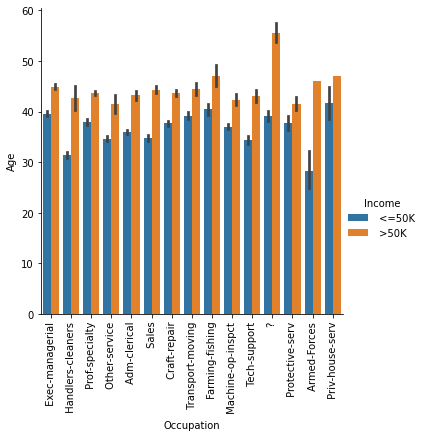

In [59]:
sns.catplot(x='Occupation',y='Age',hue='Income',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

People having age more than 50 Years and having a unknown(?) occupation are earning more than 50 thousand yearly

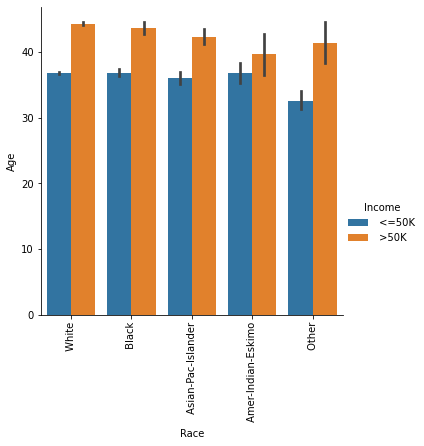

In [61]:
sns.catplot(x='Race',y='Age',hue='Income',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

White People having age more than 40 are earning more than 50k

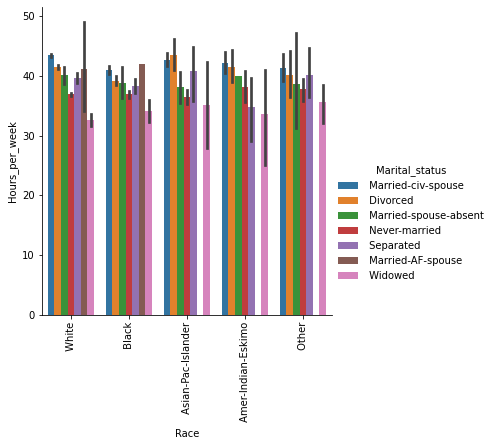

In [64]:
sns.catplot(x='Race',y='Hours_per_week',hue='Marital_status',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

White people who has married to civilian spouse are working more than 40 hours per week,where as white people those are married to a spouse in the Armed Forces are working approx 40 hours per week.Also white people who are widowed, working less than 35 hours per week.

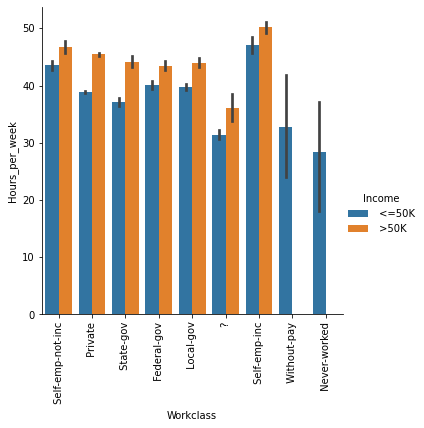

In [65]:
sns.catplot(x='Workclass',y='Hours_per_week',hue='Income',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

Self employed people those are earning more than 50 thousand yearly are working more than 50 hours per week.

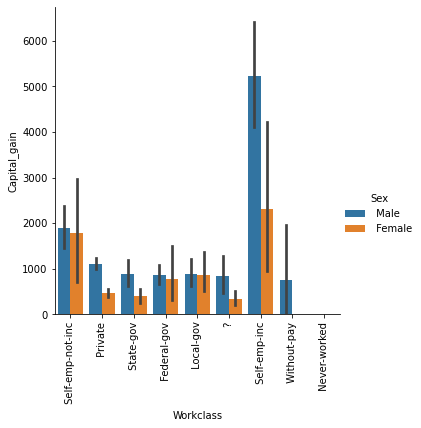

In [67]:
sns.catplot(x='Workclass',y='Capital_gain',hue='Sex',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

Self employed Male people are getting capital gain more than 5000

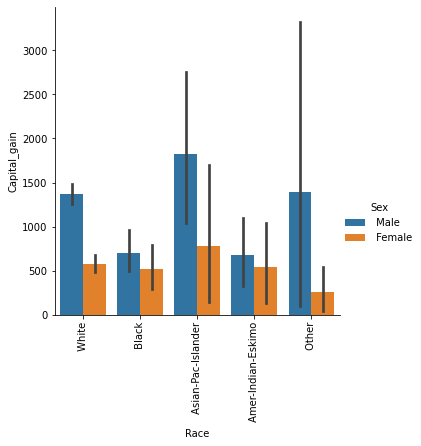

In [68]:
sns.catplot(x='Race',y='Capital_gain',hue='Sex',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

Asian pacefic islander male people are getting capital gain of approx 2000

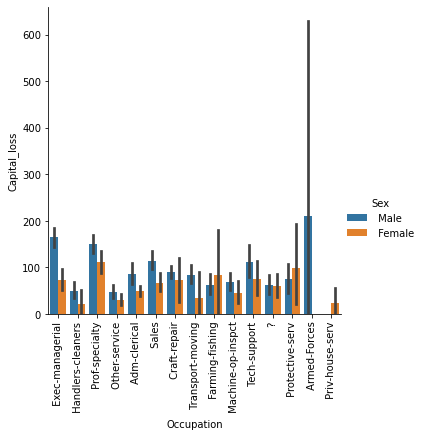

In [72]:
sns.catplot(x='Occupation',y='Capital_loss',hue='Sex',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

Male people who are in executive manager role are getting highest capital loss,as compare to other occupation people,and which is approx 200

##### Replacing the zero's with mean of the respective columns

In [66]:
#these columns have most zero's hence will replace it by mean 
l=['Capital_gain','Capital_loss']
for i in l:
    df[i]=df[i].replace(0,df[i].mean())

In [67]:
df['Capital_gain'].value_counts()

1077.615172     29849
15024.000000      347
7688.000000       284
7298.000000       246
99999.000000      159
                ...  
1111.000000         1
2538.000000         1
22040.000000        1
4931.000000         1
5060.000000         1
Name: Capital_gain, Length: 119, dtype: int64

In [68]:
df['Capital_loss'].value_counts()

87.306511      31041
1902.000000      202
1977.000000      168
1887.000000      159
1848.000000       51
               ...  
2080.000000        1
1539.000000        1
1844.000000        1
2489.000000        1
1411.000000        1
Name: Capital_loss, Length: 92, dtype: int64

### Encoding
##### Now I'll convert all the categorical columns into numeric one by applying label encoder technique
### Label Encoder

In [69]:
import sklearn 
from sklearn.preprocessing import LabelEncoder

In [70]:
m=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
for j in m:
    df[j]=LabelEncoder().fit_transform(df[j].astype(str))

In [71]:
df

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          6   83311          9             13               2   
1       38          4  215646         11              9               0   
2       53          4  234721          1              7               2   
3       28          4  338409          9             13               2   
4       37          4  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   27          4  257302          7             12               2   
32556   40          4  154374         11              9               2   
32557   58          4  151910         11              9               6   
32558   22          4  201490         11              9               4   
32559   52          5  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               4             0     4    1   1077.615172     87.306511   
1               6             1     4    1   1077.615172     87.306511   
2               6             0     2    1   1077.615172     87.306511   
3              10             5     2    0   1077.615172     87.306511   
4               4             5     4    0   1077.615172     87.306511   
...           ...           ...   ...  ...           ...           ...   
32555          13             5     4    0   1077.615172     87.306511   
32556           7             0     4    1   1077.615172     87.306511   
32557           1             4     4    0   1077.615172     87.306511   
32558           1             3     4    1   1077.615172     87.306511   
32559           4             5     4    0  15024.000000     87.306511   

       Hours_per_week  Native_country  Income  
0                  13              39       0  
1                  40              39       0  
2                  40              39       0  
3                  40               5       0  
4                  40              39       0  
...               ...             ...     ...  
32555              38              39       0  
32556              40              39       1  
32557              40              39       0  
32558              20              39       0  
32559              40              39       1  

[32560 rows x 15 columns]

In [72]:
df.Income.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

###### Here 0 represents income less or equal to 50 thousand(<=50k)
###### and 1 represents income greater to 50 thousand(>50k)

#### 6.ViolinPlot

The Violin-Plot for the attribute Age is-
 AxesSubplot(0.125,0.125;0.775x0.755)


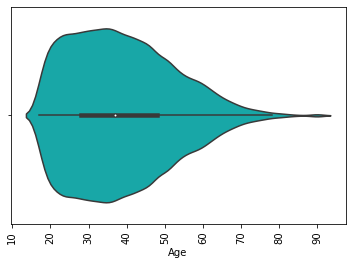



The Violin-Plot for the attribute Workclass is-
 AxesSubplot(0.125,0.125;0.775x0.755)


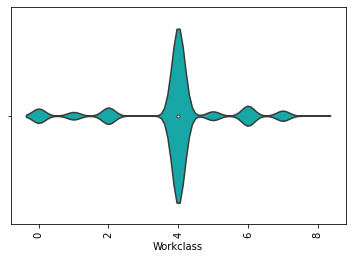



The Violin-Plot for the attribute Fnlwgt is-
 AxesSubplot(0.125,0.125;0.775x0.755)


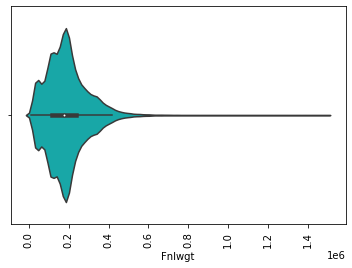



The Violin-Plot for the attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


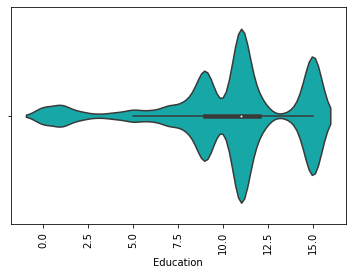



The Violin-Plot for the attribute Education_num is-
 AxesSubplot(0.125,0.125;0.775x0.755)


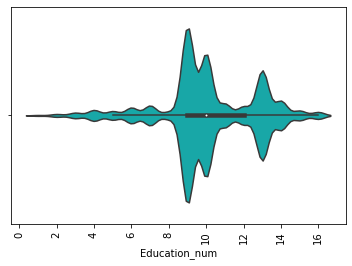



The Violin-Plot for the attribute Marital_status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


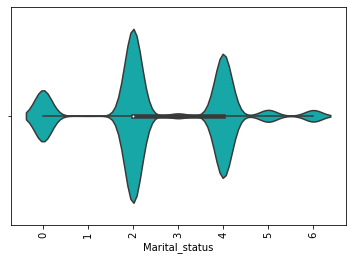



The Violin-Plot for the attribute Occupation is-
 AxesSubplot(0.125,0.125;0.775x0.755)


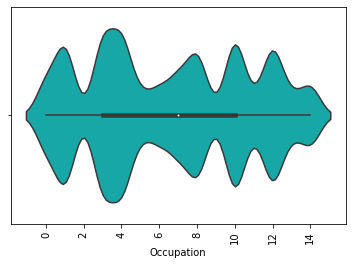



The Violin-Plot for the attribute Relationship is-
 AxesSubplot(0.125,0.125;0.775x0.755)


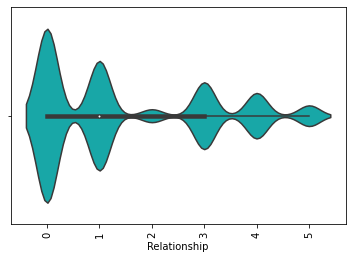



The Violin-Plot for the attribute Race is-
 AxesSubplot(0.125,0.125;0.775x0.755)


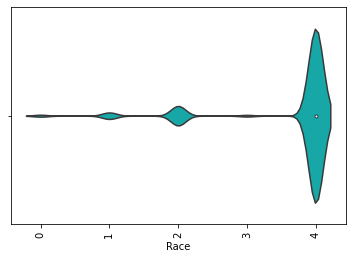



The Violin-Plot for the attribute Sex is-
 AxesSubplot(0.125,0.125;0.775x0.755)


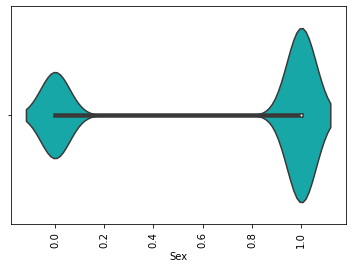



The Violin-Plot for the attribute Capital_gain is-
 AxesSubplot(0.125,0.125;0.775x0.755)


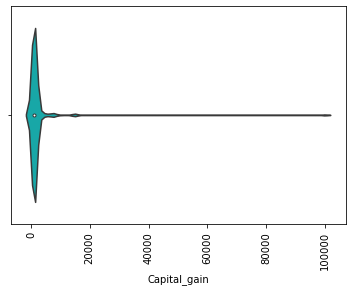



The Violin-Plot for the attribute Capital_loss is-
 AxesSubplot(0.125,0.125;0.775x0.755)


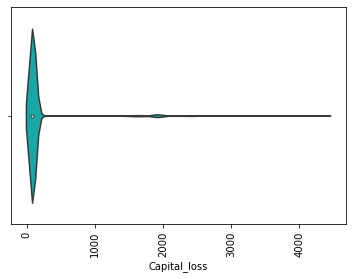



The Violin-Plot for the attribute Hours_per_week is-
 AxesSubplot(0.125,0.125;0.775x0.755)


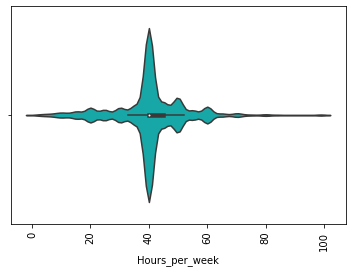



The Violin-Plot for the attribute Native_country is-
 AxesSubplot(0.125,0.125;0.775x0.755)


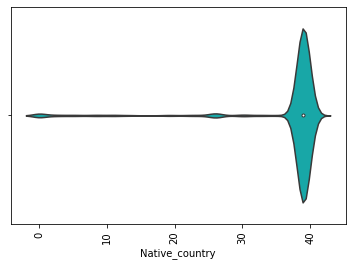



The Violin-Plot for the attribute Income is-
 AxesSubplot(0.125,0.125;0.775x0.755)


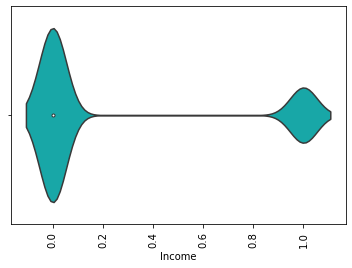

In [82]:
for i in df.columns:
    print(f'The Violin-Plot for the attribute {i} is-\n {sns.violinplot(df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### Violin plot basically indicates that what is the width of datapoints having most frequency.
As we can see in this plot we can say that most of the people who are working have age (20-40Years).


#### 7.Pairplot

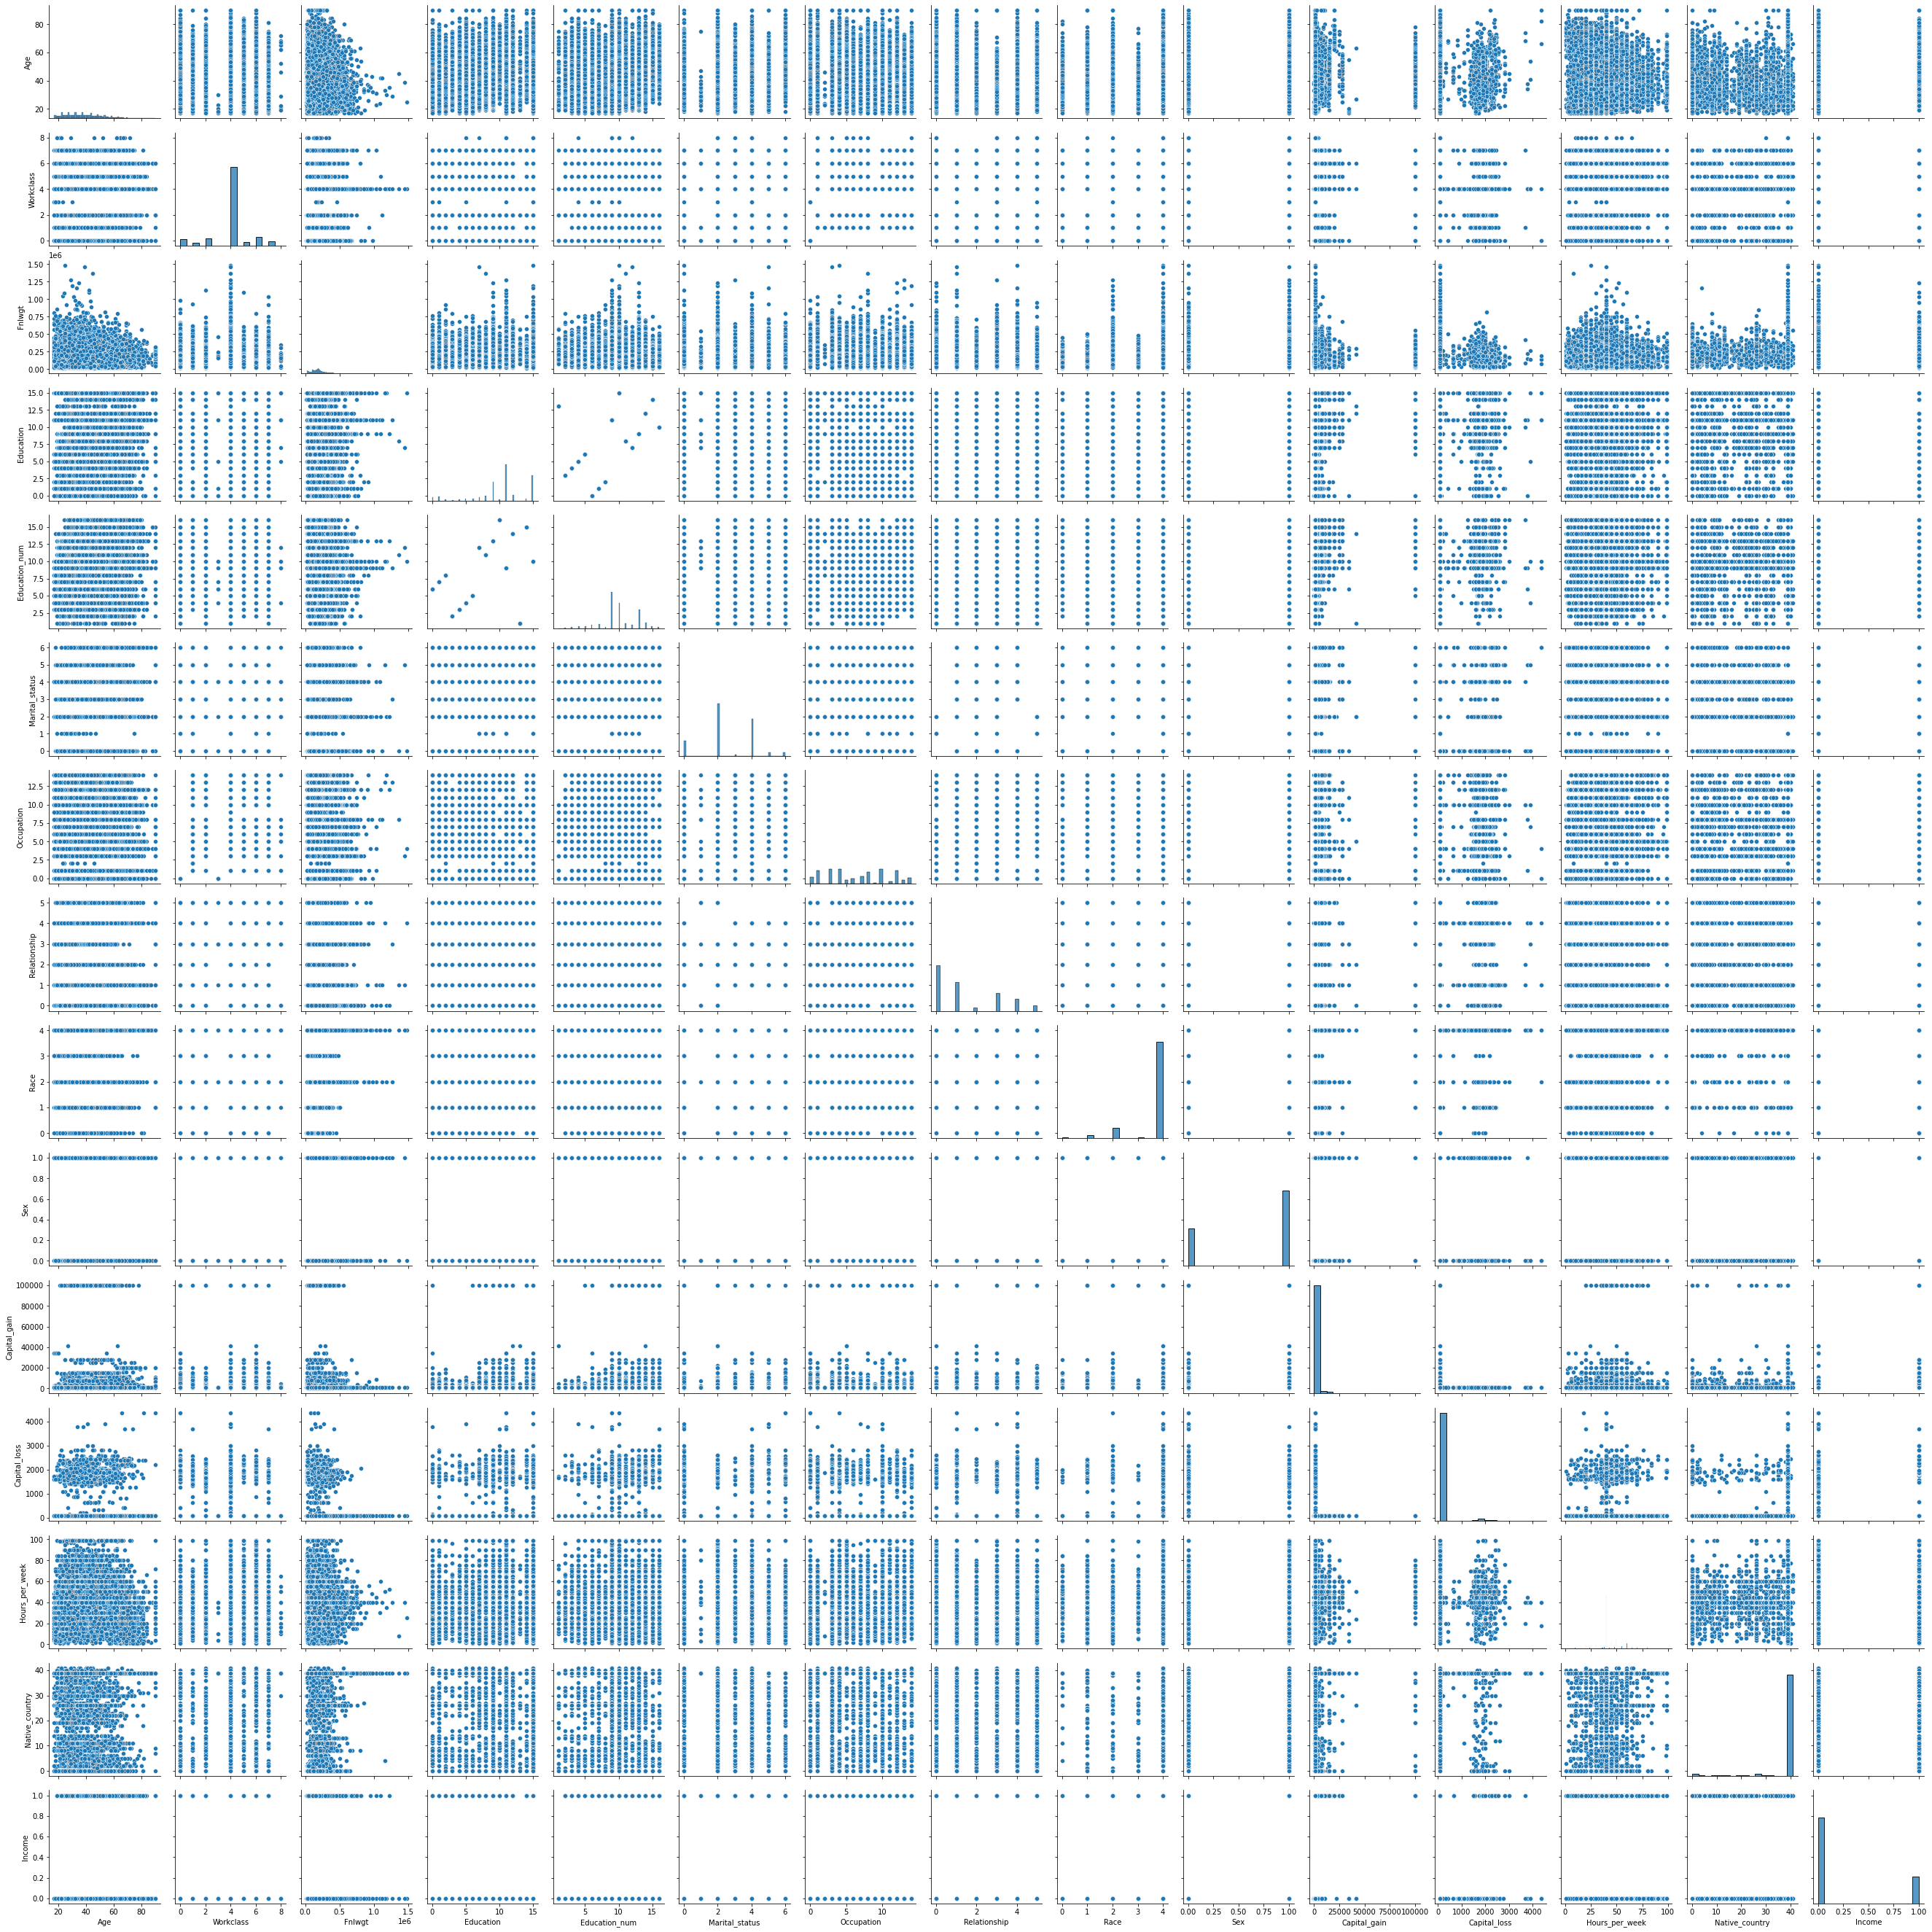

In [84]:
sns.pairplot(df)
plt.show()

Attributes Education and Education_num have strong linear correlation

### Descriptive Statistics

In [86]:
df.describe().transpose()

count           mean            std           min  \
Age             32560.0      38.581634      13.640642     17.000000   
Workclass       32560.0       3.868796       1.455879      0.000000   
Fnlwgt          32560.0  189781.814373  105549.764924  12285.000000   
Education       32560.0      10.298249       3.870317      0.000000   
Education_num   32560.0      10.080590       2.572709      1.000000   
Marital_status  32560.0       2.611794       1.506225      0.000000   
Occupation      32560.0       6.572912       4.228809      0.000000   
Relationship    32560.0       1.446376       1.606794      0.000000   
Race            32560.0       3.665848       0.848817      0.000000   
Sex             32560.0       0.669195       0.470510      0.000000   
Capital_gain    32560.0    2065.506304    7245.938132    114.000000   
Capital_loss    32560.0     170.539970     384.950157     87.306511   
Hours_per_week  32560.0      40.437469      12.347618      1.000000   
Native_country  32560.0      36.718796       7.823892      0.000000   
Income          32560.0       0.240817       0.427586      0.000000   

                          25%            50%            75%        max  
Age                 28.000000      37.000000      48.000000       90.0  
Workclass            4.000000       4.000000       4.000000        8.0  
Fnlwgt          117831.500000  178363.000000  237054.500000  1484705.0  
Education            9.000000      11.000000      12.000000       15.0  
Education_num        9.000000      10.000000      12.000000       16.0  
Marital_status       2.000000       2.000000       4.000000        6.0  
Occupation           3.000000       7.000000      10.000000       14.0  
Relationship         0.000000       1.000000       3.000000        5.0  
Race                 4.000000       4.000000       4.000000        4.0  
Sex                  0.000000       1.000000       1.000000        1.0  
Capital_gain      1077.615172    1077.615172    1077.615172    99999.0  
Capital_loss        87.306511      87.306511      87.306511     4356.0  
Hours_per_week      40.000000      40.000000      45.000000       99.0  
Native_country      39.000000      39.000000      39.000000       41.0  
Income               0.000000       0.000000       0.000000        1.0

As we can see in the above chart attributes- Education and Native_country have more median than their respective mean,which indicates that data might skewed left hand side as well and also the interquartile difference for Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Native_country are varying too much hence there might be possibility that outliers are present in the data set.
#### Note.I'm not going to apply statistical properties over any of the categorical columns.

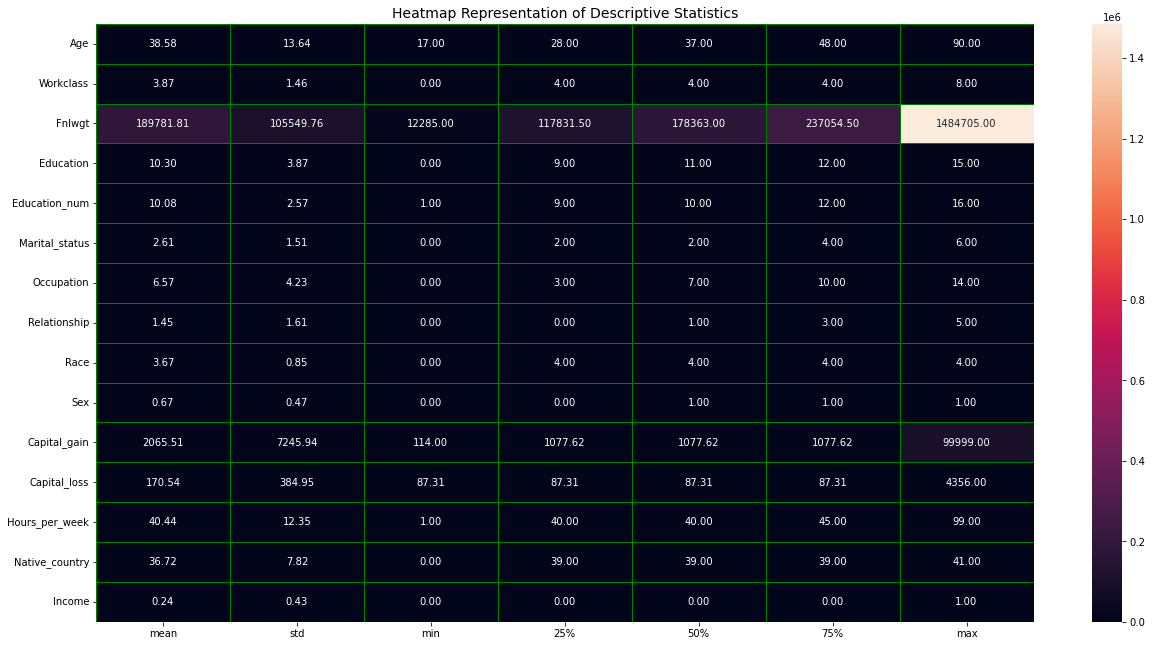

In [95]:
plt.figure(figsize=(21,11))
sns.heatmap(df.describe()[1:].transpose(),annot=True,linecolor='Green',linewidth='0.5',fmt='0.2f')
plt.title('Heatmap Representation of Descriptive Statistics',fontsize=14)
plt.show()

### Correlation

In [96]:
df.corr().Income.sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Native_country    0.015845
Workclass         0.051645
Race              0.071853
Occupation        0.075448
Education         0.079311
Capital_loss      0.150934
Sex               0.215995
Capital_gain      0.216691
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

See, there are three attributes having negative values and its showing us that there is negative correlation b/w Income (which is our target variable) and other respective Negative attributes.Hence will remove all the negative correlated columns later in data cleaning phase.Negative correlation means if input is +ve then output is -ve and vice-versa whereas, Positive correlation means if input is +ve then output would also be +ve and vice-versa. Also we'll not remove any categorical columns in this process

##### The attributes those are giving negative correlation are---Relationship,Marital_status,Fnlwgt where only Fnlwgt is numeric variable which i'll drop from the dataframe while rest are either target variable or categorical one hence will not remove any of these negative correlated columns.

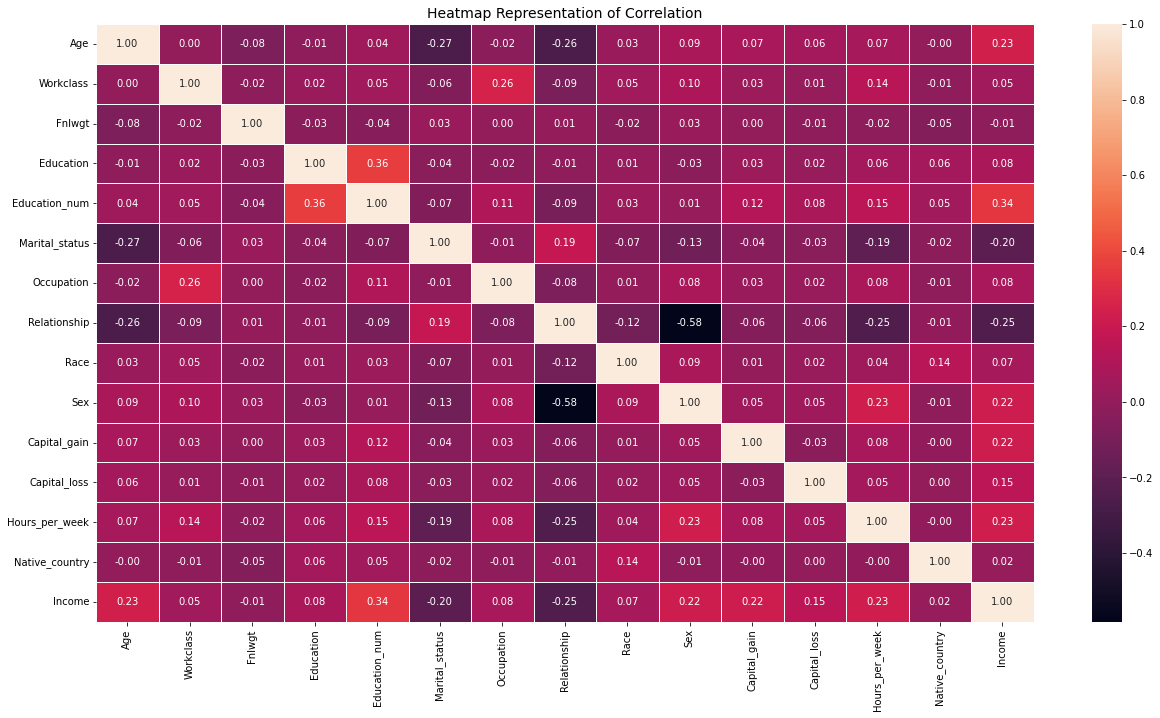

In [97]:
plt.figure(figsize=(21,11))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidth='1',fmt='0.2f')
plt.title('Heatmap Representation of Correlation',fontsize=14)
plt.show()

### Multicollinearity

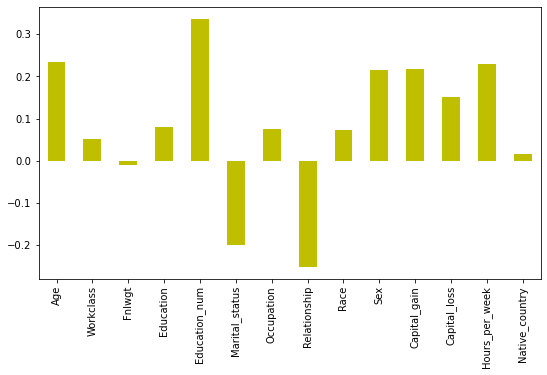

In [111]:
plt.figure(figsize=(9,5))
df.corr().Income.drop(['Income']).plot(kind='bar',color='y')
plt.show()

###### i'll check the multicollinearity later in the Data Cleansing portion when i'll be calculating the Variance inflation factor.

### Skewness

In [112]:
df.skew().sort_values()

Native_country    -3.658235
Race              -2.435332
Education         -0.934063
Workclass         -0.752280
Sex               -0.719244
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Hours_per_week     0.227636
Age                0.558738
Relationship       0.786784
Income             1.212383
Fnlwgt             1.446972
Capital_loss       4.622613
Capital_gain      12.248734
dtype: float64

The threshold value of Skewness is +/=0.5. Attributes- Education_num,Marital_status,Occupation,Hours_per_week,Age are only in the range while others are either skewed right or left. will remove skewness from thses columns later on in data cleansing part,also will not touch target column and categorical columns for removing the skewness.
##### Categorical and Target Column = Native_country,Race,Education,Workclass,Sex,Marital_status,Occupation,Relationship,Income

### Distribution Plot
##### Here we can now check the normal distribution pattern for each of the attributes which are skewed left or right hand side

The Distribution Plot for attribute Age is-
 AxesSubplot(0.125,0.125;0.775x0.755)


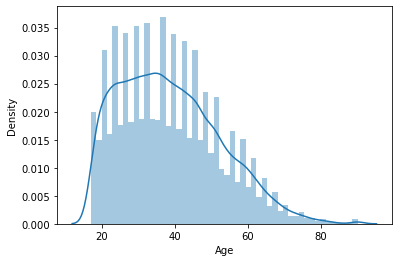



The Distribution Plot for attribute Workclass is-
 AxesSubplot(0.125,0.125;0.775x0.755)


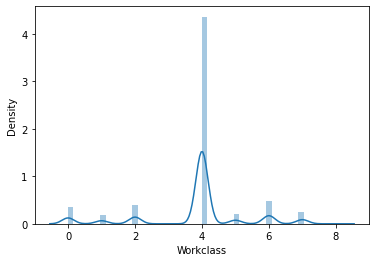



The Distribution Plot for attribute Fnlwgt is-
 AxesSubplot(0.125,0.125;0.775x0.755)


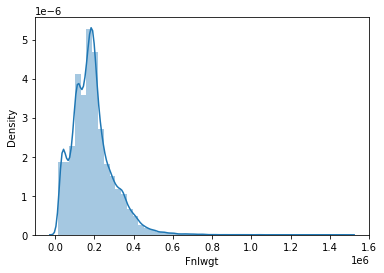



The Distribution Plot for attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


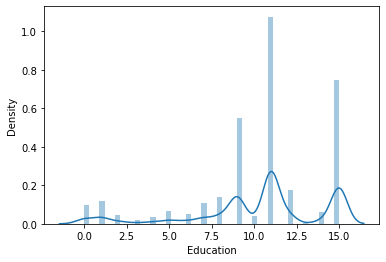



The Distribution Plot for attribute Education_num is-
 AxesSubplot(0.125,0.125;0.775x0.755)


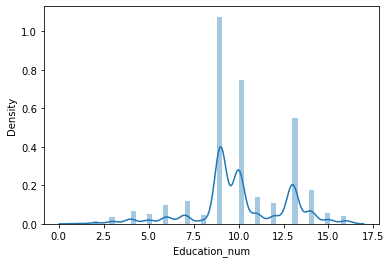



The Distribution Plot for attribute Marital_status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


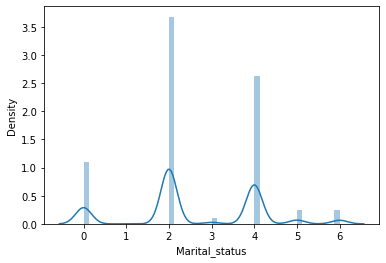



The Distribution Plot for attribute Occupation is-
 AxesSubplot(0.125,0.125;0.775x0.755)


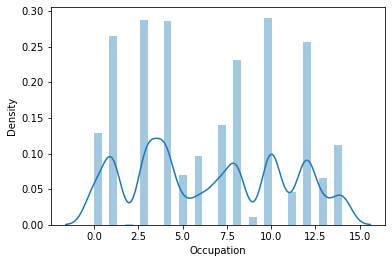



The Distribution Plot for attribute Relationship is-
 AxesSubplot(0.125,0.125;0.775x0.755)


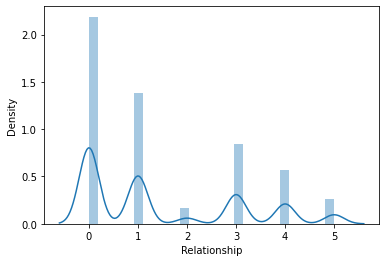



The Distribution Plot for attribute Race is-
 AxesSubplot(0.125,0.125;0.775x0.755)


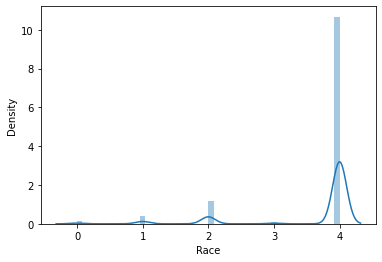



The Distribution Plot for attribute Sex is-
 AxesSubplot(0.125,0.125;0.775x0.755)


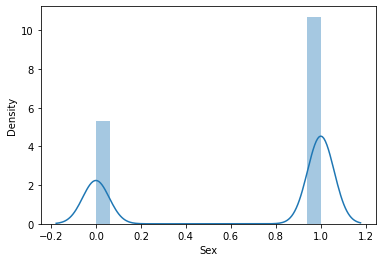



The Distribution Plot for attribute Capital_gain is-
 AxesSubplot(0.125,0.125;0.775x0.755)


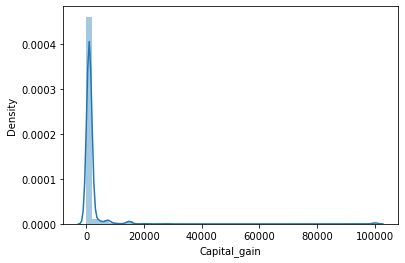



The Distribution Plot for attribute Capital_loss is-
 AxesSubplot(0.125,0.125;0.775x0.755)


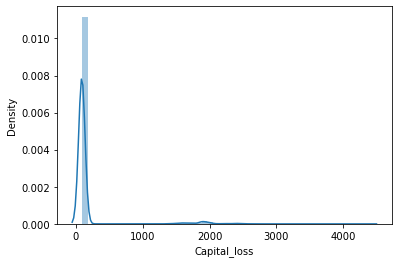



The Distribution Plot for attribute Hours_per_week is-
 AxesSubplot(0.125,0.125;0.775x0.755)


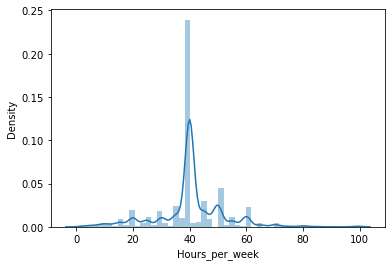



The Distribution Plot for attribute Native_country is-
 AxesSubplot(0.125,0.125;0.775x0.755)


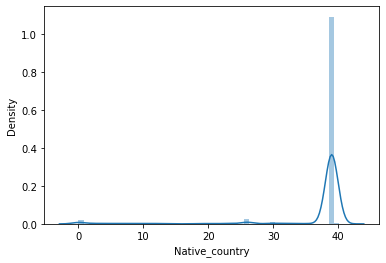



The Distribution Plot for attribute Income is-
 AxesSubplot(0.125,0.125;0.775x0.755)


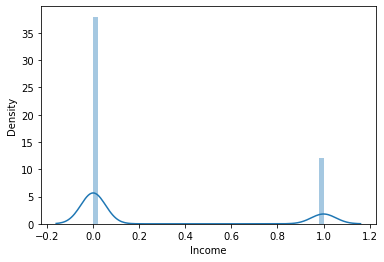

In [120]:
for i in df.columns:
    print(f'The Distribution Plot for attribute {i} is-\n {sns.distplot(df[i])}')
    plt.show()
    print('\n')

As we can see in the above distribution plots all of the attributes are skewed both right ad left hand side.Ergo,i'll remove the skewness later on the data cleansing section by power transfrorm or boxcox method

### Outliers

In [73]:
z=np.abs(zscore(df))
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([13, 12,  8, ...,  8,  8,  8], dtype=int64))

we can see that there are lots of rows and columns are present having outliers

In [74]:
print(z.iloc[3,13])
print(z.iloc[9,12])
print(z.iloc[32552,8])

4.054156655343599
3.2041109525634903
3.1407120742466126


### Boxplots To check the Outliers

The Box-Plot for attribute Age is-
 AxesSubplot(0.125,0.125;0.775x0.755)


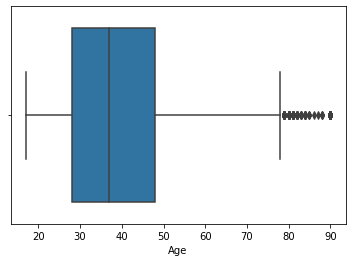



The Box-Plot for attribute Workclass is-
 AxesSubplot(0.125,0.125;0.775x0.755)


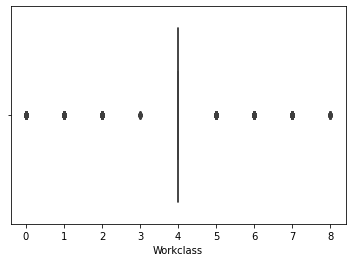



The Box-Plot for attribute Fnlwgt is-
 AxesSubplot(0.125,0.125;0.775x0.755)


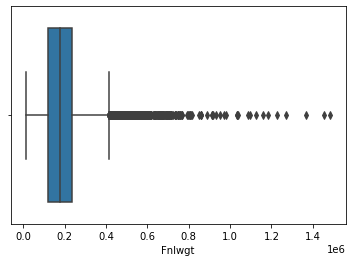



The Box-Plot for attribute Education is-
 AxesSubplot(0.125,0.125;0.775x0.755)


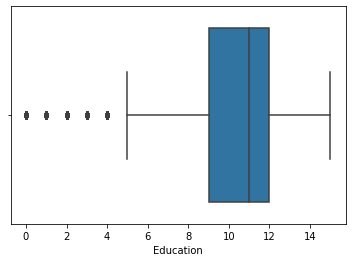



The Box-Plot for attribute Education_num is-
 AxesSubplot(0.125,0.125;0.775x0.755)


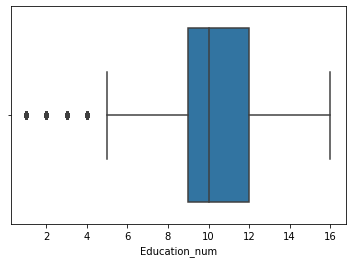



The Box-Plot for attribute Marital_status is-
 AxesSubplot(0.125,0.125;0.775x0.755)


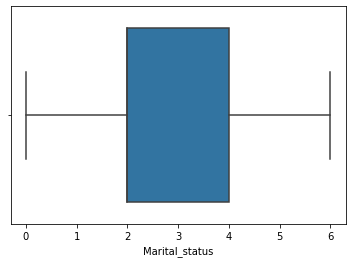



The Box-Plot for attribute Occupation is-
 AxesSubplot(0.125,0.125;0.775x0.755)


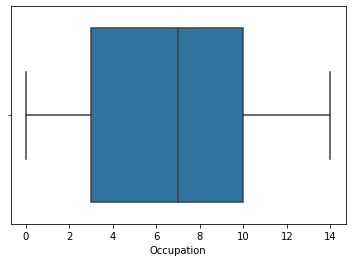



The Box-Plot for attribute Relationship is-
 AxesSubplot(0.125,0.125;0.775x0.755)


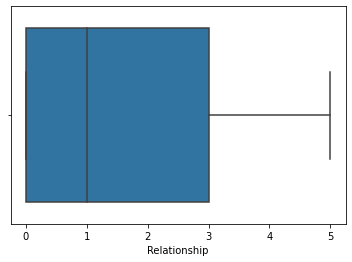



The Box-Plot for attribute Race is-
 AxesSubplot(0.125,0.125;0.775x0.755)


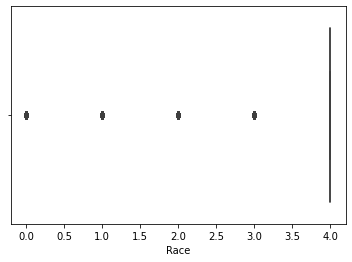



The Box-Plot for attribute Sex is-
 AxesSubplot(0.125,0.125;0.775x0.755)


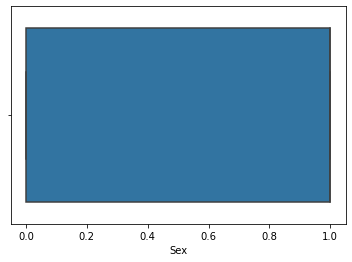



The Box-Plot for attribute Capital_gain is-
 AxesSubplot(0.125,0.125;0.775x0.755)


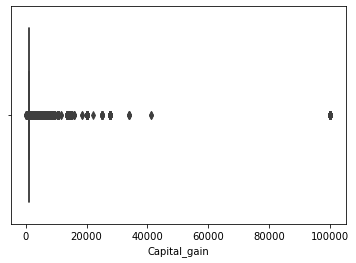



The Box-Plot for attribute Capital_loss is-
 AxesSubplot(0.125,0.125;0.775x0.755)


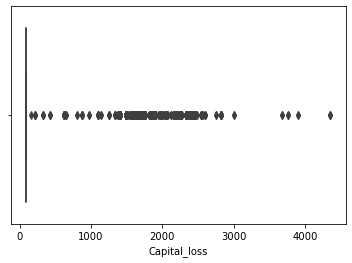



The Box-Plot for attribute Hours_per_week is-
 AxesSubplot(0.125,0.125;0.775x0.755)


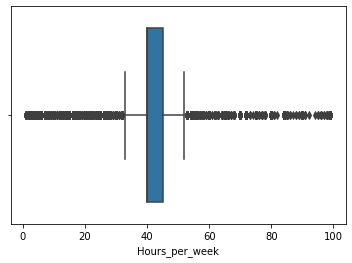



The Box-Plot for attribute Native_country is-
 AxesSubplot(0.125,0.125;0.775x0.755)


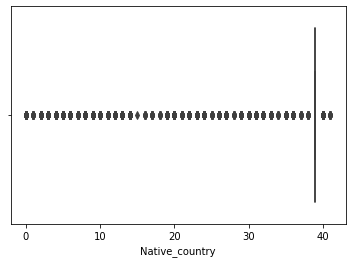



The Box-Plot for attribute Income is-
 AxesSubplot(0.125,0.125;0.775x0.755)


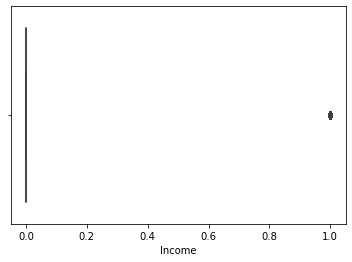

In [124]:
for i in df.columns:
    print(f'The Box-Plot for attribute {i} is-\n {sns.boxplot(df[i])}')
    plt.show()
    print('\n')

As we can see in the above boxplot images there might be possibility of outliers presence in attributes-Age, workclass,Fnlwgt, Education,Education_num,Race,capital_gain,capital_loss,Hours_per_week,Native_country and I'll remove the same in next part of data cleansing

### Data Cleansing
#### 1. Remove Negative Correlation

In [75]:
df1=df.drop(['Fnlwgt'],axis=1)
df1

Age  Workclass  Education  Education_num  Marital_status  Occupation  \
0       50          6          9             13               2           4   
1       38          4         11              9               0           6   
2       53          4          1              7               2           6   
3       28          4          9             13               2          10   
4       37          4         12             14               2           4   
...    ...        ...        ...            ...             ...         ...   
32555   27          4          7             12               2          13   
32556   40          4         11              9               2           7   
32557   58          4         11              9               6           1   
32558   22          4         11              9               4           1   
32559   52          5         11              9               2           4   

       Relationship  Race  Sex  Capital_gain  Capital_loss  Hours_per_week  \
0                 0     4    1   1077.615172     87.306511              13   
1                 1     4    1   1077.615172     87.306511              40   
2                 0     2    1   1077.615172     87.306511              40   
3                 5     2    0   1077.615172     87.306511              40   
4                 5     4    0   1077.615172     87.306511              40   
...             ...   ...  ...           ...           ...             ...   
32555             5     4    0   1077.615172     87.306511              38   
32556             0     4    1   1077.615172     87.306511              40   
32557             4     4    0   1077.615172     87.306511              40   
32558             3     4    1   1077.615172     87.306511              20   
32559             5     4    0  15024.000000     87.306511              40   

       Native_country  Income  
0                  39       0  
1                  39       0  
2                  39       0  
3                   5       0  
4                  39       0  
...               ...     ...  
32555              39       0  
32556              39       1  
32557              39       0  
32558              39       0  
32559              39       1  

[32560 rows x 14 columns]

In [76]:
x=df1.iloc[:,0:-1]
x

Age  Workclass  Education  Education_num  Marital_status  Occupation  \
0       50          6          9             13               2           4   
1       38          4         11              9               0           6   
2       53          4          1              7               2           6   
3       28          4          9             13               2          10   
4       37          4         12             14               2           4   
...    ...        ...        ...            ...             ...         ...   
32555   27          4          7             12               2          13   
32556   40          4         11              9               2           7   
32557   58          4         11              9               6           1   
32558   22          4         11              9               4           1   
32559   52          5         11              9               2           4   

       Relationship  Race  Sex  Capital_gain  Capital_loss  Hours_per_week  \
0                 0     4    1   1077.615172     87.306511              13   
1                 1     4    1   1077.615172     87.306511              40   
2                 0     2    1   1077.615172     87.306511              40   
3                 5     2    0   1077.615172     87.306511              40   
4                 5     4    0   1077.615172     87.306511              40   
...             ...   ...  ...           ...           ...             ...   
32555             5     4    0   1077.615172     87.306511              38   
32556             0     4    1   1077.615172     87.306511              40   
32557             4     4    0   1077.615172     87.306511              40   
32558             3     4    1   1077.615172     87.306511              20   
32559             5     4    0  15024.000000     87.306511              40   

       Native_country  
0                  39  
1                  39  
2                  39  
3                   5  
4                  39  
...               ...  
32555              39  
32556              39  
32557              39  
32558              39  
32559              39  

[32560 rows x 13 columns]

### 2.Removing Multicollinearity

In [77]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
#calculating variance_inflation_factor Score
def vif():
    df2=pd.DataFrame()
    df2['Features']=x.columns
    df2['variance_inflation_factor']=[variance_inflation_factor(x.values,v) for v in range(x.shape[1])]
    print(df2)

In [79]:
vif()

          Features  variance_inflation_factor
0              Age                   8.519467
1        Workclass                   8.466573
2        Education                   9.204555
3    Education_num                  18.373391
4   Marital_status                   3.935997
5       Occupation                   3.709269
6     Relationship                   2.581590
7             Race                  17.442216
8              Sex                   4.400717
9     Capital_gain                   1.106809
10    Capital_loss                   1.214128
11  Hours_per_week                  12.103859
12  Native_country                  19.642072


Capital_gain & Capital_loss are having almost same correlative w.r.t. target variable Income but Capital_loss are having least coorelation as comapre to it hence will drop and since most of the columns of the categorical one hence will not drop those.

In [80]:
df3=df1.drop(['Capital_loss'],axis=1)
df3

Age  Workclass  Education  Education_num  Marital_status  Occupation  \
0       50          6          9             13               2           4   
1       38          4         11              9               0           6   
2       53          4          1              7               2           6   
3       28          4          9             13               2          10   
4       37          4         12             14               2           4   
...    ...        ...        ...            ...             ...         ...   
32555   27          4          7             12               2          13   
32556   40          4         11              9               2           7   
32557   58          4         11              9               6           1   
32558   22          4         11              9               4           1   
32559   52          5         11              9               2           4   

       Relationship  Race  Sex  Capital_gain  Hours_per_week  Native_country  \
0                 0     4    1   1077.615172              13              39   
1                 1     4    1   1077.615172              40              39   
2                 0     2    1   1077.615172              40              39   
3                 5     2    0   1077.615172              40               5   
4                 5     4    0   1077.615172              40              39   
...             ...   ...  ...           ...             ...             ...   
32555             5     4    0   1077.615172              38              39   
32556             0     4    1   1077.615172              40              39   
32557             4     4    0   1077.615172              40              39   
32558             3     4    1   1077.615172              20              39   
32559             5     4    0  15024.000000              40              39   

       Income  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
32555       0  
32556       1  
32557       0  
32558       0  
32559       1  

[32560 rows x 13 columns]

### 3.Removing Outliers

In [81]:
df4=df3[(z<3).all(axis=1)]
df4

Age  Workclass  Education  Education_num  Marital_status  Occupation  \
0       50          6          9             13               2           4   
1       38          4         11              9               0           6   
2       53          4          1              7               2           6   
4       37          4         12             14               2           4   
5       49          4          6              5               3           8   
...    ...        ...        ...            ...             ...         ...   
32555   27          4          7             12               2          13   
32556   40          4         11              9               2           7   
32557   58          4         11              9               6           1   
32558   22          4         11              9               4           1   
32559   52          5         11              9               2           4   

       Relationship  Race  Sex  Capital_gain  Hours_per_week  Native_country  \
0                 0     4    1   1077.615172              13              39   
1                 1     4    1   1077.615172              40              39   
2                 0     2    1   1077.615172              40              39   
4                 5     4    0   1077.615172              40              39   
5                 1     2    0   1077.615172              16              23   
...             ...   ...  ...           ...             ...             ...   
32555             5     4    0   1077.615172              38              39   
32556             0     4    1   1077.615172              40              39   
32557             4     4    0   1077.615172              40              39   
32558             3     4    1   1077.615172              20              39   
32559             5     4    0  15024.000000              40              39   

       Income  
0           0  
1           0  
2           0  
4           0  
5           0  
...       ...  
32555       0  
32556       1  
32557       0  
32558       0  
32559       1  

[27417 rows x 13 columns]

In [82]:
print(df3.shape)
print(df4.shape)

(32560, 13)
(27417, 13)


In [83]:
percentage_loss=(32560-27417)*100/32560
percentage_loss

15.795454545454545

since the threshold value I'm considering for the outliers is 10% but I'm getting here 16% which is ofcourse on a higher side but since I've still 27 thousand + data which i think a enough data and it will work good if i even consider the outliers removal,hence will remove the outliers

### 4.Removing Skewness

In [84]:
df4.skew().sort_values()

Native_country   -5.460675
Race             -2.592931
Education        -0.957458
Workclass        -0.738023
Sex              -0.684115
Hours_per_week   -0.358396
Education_num    -0.143960
Marital_status   -0.044317
Occupation        0.131148
Age               0.483478
Relationship      0.750207
Income            1.324919
Capital_gain      5.304109
dtype: float64

There are lots of attributes are skewed either left or right but except attribute Capital_gain rest are the categorical attributes hence will remove skewness only in Capital_gain. 

### Using Boxcox method to remove Skewness

In [93]:
df4['Capital_gain']=scipy.stats.boxcox(df4['Capital_gain'])[0]
df4['Capital_gain']

0       -0.000539
1       -0.000539
2       -0.000539
4       -0.000539
5       -0.000539
           ...   
32555   -0.000539
32556   -0.000539
32557   -0.000539
32558   -0.000539
32559   -0.000539
Name: Capital_gain, Length: 27417, dtype: float64

In [94]:
df4.skew().sort_values()

Native_country   -5.460675
Race             -2.592931
Education        -0.957458
Workclass        -0.738023
Sex              -0.684115
Hours_per_week   -0.358396
Education_num    -0.143960
Marital_status   -0.044317
Capital_gain      0.000000
Occupation        0.131148
Age               0.483478
Relationship      0.750207
Income            1.324919
dtype: float64

##### As,we can see that skewness is fully removed now in numerical columns and our data is almost normally distributed but going forward will need to transform this data in the range b/w 0 & 1 and also we have to attain the mean=0 and standard deviation =+/-1 for this will use Standard Scaler techinque

### Using Standard Scaler

In [95]:
x=df4.drop(['Income'],axis=1)
x

Age  Workclass  Education  Education_num  Marital_status  Occupation  \
0       50          6          9             13               2           4   
1       38          4         11              9               0           6   
2       53          4          1              7               2           6   
4       37          4         12             14               2           4   
5       49          4          6              5               3           8   
...    ...        ...        ...            ...             ...         ...   
32555   27          4          7             12               2          13   
32556   40          4         11              9               2           7   
32557   58          4         11              9               6           1   
32558   22          4         11              9               4           1   
32559   52          5         11              9               2           4   

       Relationship  Race  Sex  Capital_gain  Hours_per_week  Native_country  
0                 0     4    1     -0.000539              13              39  
1                 1     4    1     -0.000539              40              39  
2                 0     2    1     -0.000539              40              39  
4                 5     4    0     -0.000539              40              39  
5                 1     2    0     -0.000539              16              23  
...             ...   ...  ...           ...             ...             ...  
32555             5     4    0     -0.000539              38              39  
32556             0     4    1     -0.000539              40              39  
32557             4     4    0     -0.000539              40              39  
32558             3     4    1     -0.000539              20              39  
32559             5     4    0     -0.000539              40              39  

[27417 rows x 12 columns]

In [96]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [97]:
x=sc.fit_transform(x)
x

array([[ 0.88273868,  1.47439128, -0.34572507, ...,  0.        ,
        -2.4121897 ,  0.1938942 ],
       [-0.01173679,  0.09284389,  0.16998463, ...,  0.        ,
         0.00820029,  0.1938942 ],
       [ 1.10635755,  0.09284389, -2.40856389, ...,  0.        ,
         0.00820029,  0.1938942 ],
       ...,
       [ 1.47905566,  0.09284389,  0.16998463, ...,  0.        ,
         0.00820029,  0.1938942 ],
       [-1.20437075,  0.09284389,  0.16998463, ...,  0.        ,
        -1.78468118,  0.1938942 ],
       [ 1.03181793,  0.78361759,  0.16998463, ...,  0.        ,
         0.00820029,  0.1938942 ]])

Mean is= -6.058976927863981e-17
Standard_Deviation= 0.9574271077563381


AxesSubplot(0.125,0.125;0.775x0.755)


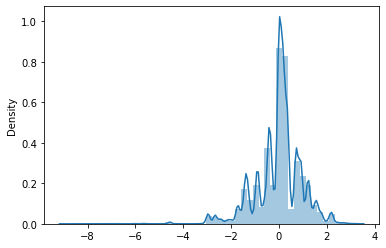

In [98]:
print('Mean is=',x.mean())
print('Standard_Deviation=',x.std())
print('\n')
print(sns.distplot(x))
plt.show()

##### Now,almost our features is normally distributed as we have got the mean almost as zero and standard deviation=1 i.e. data is fully transformed in b/w 0-1

### Using Principle Component Analysis(PCA)

In [99]:
from sklearn.decomposition import PCA

In [100]:
pca=PCA(n_components=4)
x_pca=pca.fit_transform(x)
x_pca

array([[-0.78885191, -0.05586882,  0.11470231,  0.10456477],
       [-1.05473022,  0.40396966,  0.5290309 ,  0.32183191],
       [-0.16239922,  2.89343637,  0.20516066,  1.61082392],
       ...,
       [ 1.94789621, -0.38900404,  0.75615937,  0.07950822],
       [ 1.68255962,  0.13384651,  0.00389248, -1.60521472],
       [ 1.2970205 , -0.60956822,  0.53082861,  1.68921216]])

In [101]:
x=x_pca
x

array([[-0.78885191, -0.05586882,  0.11470231,  0.10456477],
       [-1.05473022,  0.40396966,  0.5290309 ,  0.32183191],
       [-0.16239922,  2.89343637,  0.20516066,  1.61082392],
       ...,
       [ 1.94789621, -0.38900404,  0.75615937,  0.07950822],
       [ 1.68255962,  0.13384651,  0.00389248, -1.60521472],
       [ 1.2970205 , -0.60956822,  0.53082861,  1.68921216]])

In [102]:
#target variable
y=df4['Income']
y

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 27417, dtype: int32

### Plotting the Relationship b/w Principle Components

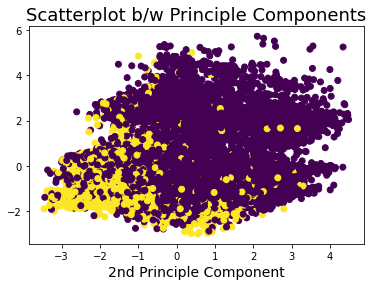

In [103]:
plt.scatter(x[:,0:1],x[:,1:2],c=y)
plt.xlabel('1st Principle Component',fontsize=14)
plt.xlabel('2nd Principle Component',fontsize=14)
plt.title('Scatterplot b/w Principle Components',fontsize=18)
plt.show()

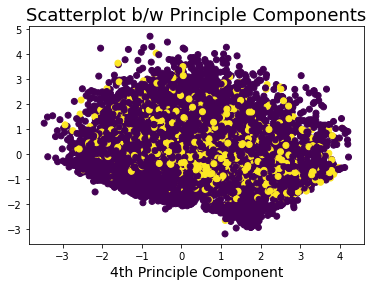

In [104]:
plt.scatter(x[:,2:3],x[:,3:4],c=y)
plt.xlabel('3rd Principle Component',fontsize=14)
plt.xlabel('4th Principle Component',fontsize=14)
plt.title('Scatterplot b/w Principle Components',fontsize=18)
plt.show()

Above two diagrams tells us that our feature variables are distributed and mixed well that's a good sign going forward

### Using IMBlearn Balancing Techniques

In [105]:
#our Target variable classes needs to be balanced
y.value_counts()

0    21279
1     6138
Name: Income, dtype: int64

In [169]:
!pip install -U imbalanced-learn

In [106]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [107]:
y.value_counts()

0    21279
1    21279
Name: Income, dtype: int64

In [108]:
print(x.shape)
print(y.shape)

(42558, 4)
(42558,)


### Training_Testing Phase
##### I am going to train 80% of the data and testing size would be 20%
##### first will try to find out the best value for random_state

In [109]:
#importing machine learning libraries for Classification model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
lr=LogisticRegression()

In [110]:
#finding out the best random_state 
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    if accuracy_score(pred_train,y_train)==accuracy_score(pred_test,y_test):
        print(f'At random_state-{i} The Logistic Regression Model performs really well')
        print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
        print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
        print(f'Confusion Matrix for the model is\t {Confusion_matrix(pred_test,y_test)}')
        print(f'Classification Report for the model is\t {classification_report(pred_test,y_test)}')
        print('\n')
    else:
        print(f'At random_state-{i} The Training and Testing Accuracy of the model is different')
        print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
        print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
        print(f'Confusion Matrix for the model is\n {confusion_matrix(pred_test,y_test)}')
        print(f'Classification Report for the model is\n {classification_report(pred_test,y_test)}')
        print('\n')             

At random_state-0 The Training and Testing Accuracy of the model is different
Training accuracy of the model is	 0.7375315749280386
Testing accuracy of the model is	 0.7421287593984962
Confusion Matrix for the model is
 [[2928  894]
 [1301 3389]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.69      0.77      0.73      3822
           1       0.79      0.72      0.76      4690

    accuracy                           0.74      8512
   macro avg       0.74      0.74      0.74      8512
weighted avg       0.75      0.74      0.74      8512



At random_state-1 The Training and Testing Accuracy of the model is different
Training accuracy of the model is	 0.7387358279974152
Testing accuracy of the model is	 0.7389567669172933
Confusion Matrix for the model is
 [[2909  900]
 [1322 3381]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.69      0.76      0.7

In [111]:
#choosing random_state as 99
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train)
print(f'At random_state-{i} The Training and Testing Accuracy of the model is almost same')
print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
print(f'Confusion Matrix for the model is\n {confusion_matrix(pred_test,y_test)}')
print(f'Classification Report for the model is\n {classification_report(pred_test,y_test)}')

At random_state-99 The Training and Testing Accuracy of the model is almost same
Training accuracy of the model is	 0.7386477119191682
Testing accuracy of the model is	 0.7378994360902256
Confusion Matrix for the model is
 [[2899  891]
 [1340 3382]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.68      0.76      0.72      3790
           1       0.79      0.72      0.75      4722

    accuracy                           0.74      8512
   macro avg       0.74      0.74      0.74      8512
weighted avg       0.74      0.74      0.74      8512



##### At random_state 99 I'm getting almost equal training and testing accuracy score and equal f1-score too,which indicates model is performing well and now let's try few more models so that we can make a strong prediction going forward

### Finding Out CV Score

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
for i in range(2,11):
    cvs=cross_val_score(lr,x,y,cv=i)
    mean=cvs.mean()
    std=cvs.std()
    print(f'At K-Fold {i} the CV Score of the logistic model is {mean} and standard deviation is {std}\n')

At K-Fold 2 the CV Score of the logistic model is 0.7385920390995817 and standard deviation is 0.0006344283096010317

At K-Fold 3 the CV Score of the logistic model is 0.7387330231683821 and standard deviation is 0.002852581529783641

At K-Fold 4 the CV Score of the logistic model is 0.7384275902358113 and standard deviation is 0.0021792182441644466

At K-Fold 5 the CV Score of the logistic model is 0.7384040793515336 and standard deviation is 0.0024821327347988036

At K-Fold 6 the CV Score of the logistic model is 0.7386155364443817 and standard deviation is 0.003782123743267017

At K-Fold 7 the CV Score of the logistic model is 0.738639206277744 and standard deviation is 0.005778658930206098

At K-Fold 8 the CV Score of the logistic model is 0.7384747074609819 and standard deviation is 0.0033594186984038147

At K-Fold 9 the CV Score of the logistic model is 0.7388037080728682 and standard deviation is 0.005493847665087615

At K-Fold 10 the CV Score of the logistic model is 0.73863921

In [114]:
cvs=cross_val_score(lr,x,y,cv=10)
mean=cvs.mean()
std=cvs.std()
print(f'At K-Fold 10 the CV Score of the logistic model is {mean} and standard deviation is {std}\n')

At K-Fold 10 the CV Score of the logistic model is 0.7385920390995817 and standard deviation is 0.0006344283096010317



##### At each K-Fold I'm getting the same CV score which means model is very geniune and behaving well at each stages of training.Now lets try CV score for all other models

In [115]:
#importing other models of classification
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve,roc_auc_score
gb=GaussianNB()
mb=MultinomialNB()
neighbor=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
svm=SVC()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
grd=GradientBoostingClassifier()
sgd=SGDClassifier()

In [142]:
#creating a definition to expand the model individually
def model(algorithm,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=92)
    algorithm.fit(x_train,y_train)
    pred_train_x=algorithm.predict(x_train)
    pred_test_y=algorithm.predict(x_test)
    print(f'For model {algorithm}')
    print('Training_Accuracy_Score=',accuracy_score(y_train,pred_train_x))
    print('Testing_Accuracy_Score=',accuracy_score(y_test,pred_test_y))
    print('\n Classification Report-\n',classification_report(y_test,pred_test_y))
    print('\n Confusion Metrix-\n',confusion_matrix(y_test,pred_test_y))
    print('\n\nAUC_ROC CURVE')
    prob=algorithm.predict_proba(x_test)[:,1]
    FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
    plt.plot(FPR,TPR)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC_Curve for the model {algorithm}')
    plt.show()
    ROC_AUC_SCORE=roc_auc_score(y_test,pred_test_y)
    print('ROC AUC SCORE is-',ROC_AUC_SCORE)
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for l in range(2,4):
        cvscore=cross_val_score(algorithm,x,y,cv=l)
        cv_accuracy_score=cvscore.mean()
        print(f'At the K-Fold {l} the CV score of model {algorithm} is {cv_accuracy_score}')
        print('\n')

For model LogisticRegression()
Training_Accuracy_Score= 0.7390589202843212
Testing_Accuracy_Score= 0.7361372180451128

 Classification Report-
               precision    recall  f1-score   support

           0       0.76      0.68      0.72      4220
           1       0.72      0.79      0.75      4292

    accuracy                           0.74      8512
   macro avg       0.74      0.74      0.74      8512
weighted avg       0.74      0.74      0.74      8512


 Confusion Metrix-
 [[2880 1340]
 [ 906 3386]]


AUC_ROC CURVE


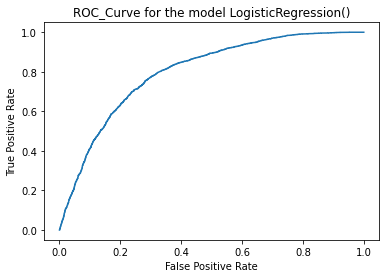

ROC AUC SCORE is- 0.735687027115365


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model LogisticRegression() is 0.7385920390995817


At the K-Fold 3 the CV score of model LogisticRegression() is 0.7387330231683821




In [117]:
model(lr,x,y)

For model GaussianNB()
Training_Accuracy_Score= 0.7241085590084004
Testing_Accuracy_Score= 0.7221569548872181

 Classification Report-
               precision    recall  f1-score   support

           0       0.75      0.65      0.70      4220
           1       0.70      0.79      0.74      4292

    accuracy                           0.72      8512
   macro avg       0.73      0.72      0.72      8512
weighted avg       0.73      0.72      0.72      8512


 Confusion Metrix-
 [[2762 1458]
 [ 907 3385]]


AUC_ROC CURVE


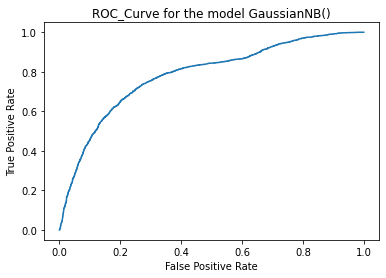

ROC AUC SCORE is- 0.7215894886551857


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GaussianNB() is 0.7237417171859579


At the K-Fold 3 the CV score of model GaussianNB() is 0.7234832463931576




In [118]:
model(gb,x,y)

For model KNeighborsClassifier()
Training_Accuracy_Score= 0.8819831992010809
Testing_Accuracy_Score= 0.8309445488721805

 Classification Report-
               precision    recall  f1-score   support

           0       0.88      0.76      0.82      4220
           1       0.79      0.90      0.84      4292

    accuracy                           0.83      8512
   macro avg       0.84      0.83      0.83      8512
weighted avg       0.84      0.83      0.83      8512


 Confusion Metrix-
 [[3217 1003]
 [ 436 3856]]


AUC_ROC CURVE


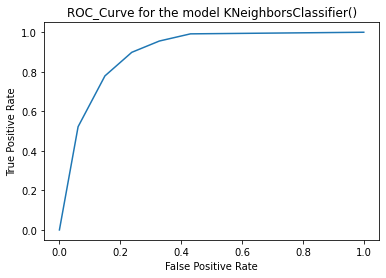

ROC AUC SCORE is- 0.8303689659589316


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier() is 0.8204567883829128


At the K-Fold 3 the CV score of model KNeighborsClassifier() is 0.8321349687485314




In [119]:
model(neighbor,x,y)

For model DecisionTreeClassifier()
Training_Accuracy_Score= 0.9780590965164777
Testing_Accuracy_Score= 0.806625939849624

 Classification Report-
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      4220
           1       0.81      0.81      0.81      4292

    accuracy                           0.81      8512
   macro avg       0.81      0.81      0.81      8512
weighted avg       0.81      0.81      0.81      8512


 Confusion Metrix-
 [[3405  815]
 [ 831 3461]]


AUC_ROC CURVE


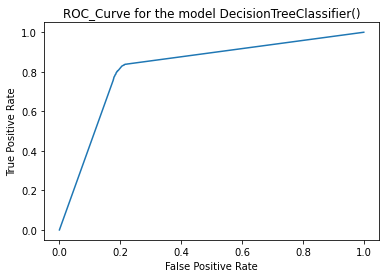

ROC AUC SCORE is- 0.8066280040458828


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model DecisionTreeClassifier() is 0.7897692560740637


At the K-Fold 3 the CV score of model DecisionTreeClassifier() is 0.8022463461628835




In [120]:
model(dtc,x,y)

For model RandomForestClassifier()
Training_Accuracy_Score= 0.9780590965164777
Testing_Accuracy_Score= 0.8492716165413534

 Classification Report-
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      4220
           1       0.84      0.87      0.85      4292

    accuracy                           0.85      8512
   macro avg       0.85      0.85      0.85      8512
weighted avg       0.85      0.85      0.85      8512


 Confusion Metrix-
 [[3493  727]
 [ 556 3736]]


AUC_ROC CURVE


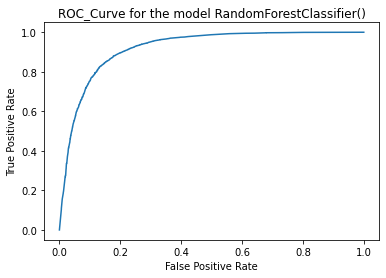

ROC AUC SCORE is- 0.849090891021762


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier() is 0.8399360872221439


At the K-Fold 3 the CV score of model RandomForestClassifier() is 0.8494760092109591




In [121]:
model(rfc,x,y)

For model AdaBoostClassifier()
Training_Accuracy_Score= 0.7553897667861129
Testing_Accuracy_Score= 0.7488251879699248

 Classification Report-
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      4220
           1       0.74      0.78      0.76      4292

    accuracy                           0.75      8512
   macro avg       0.75      0.75      0.75      8512
weighted avg       0.75      0.75      0.75      8512


 Confusion Metrix-
 [[3020 1200]
 [ 938 3354]]


AUC_ROC CURVE


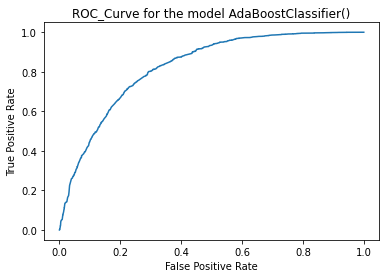

ROC AUC SCORE is- 0.7485468390436522


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.750552187602801


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.7533953663236055




In [122]:
model(ad,x,y)

For model GradientBoostingClassifier()
Training_Accuracy_Score= 0.7846149327380603
Testing_Accuracy_Score= 0.7742011278195489

 Classification Report-
               precision    recall  f1-score   support

           0       0.80      0.73      0.76      4220
           1       0.75      0.82      0.79      4292

    accuracy                           0.77      8512
   macro avg       0.78      0.77      0.77      8512
weighted avg       0.78      0.77      0.77      8512


 Confusion Metrix-
 [[3067 1153]
 [ 769 3523]]


AUC_ROC CURVE


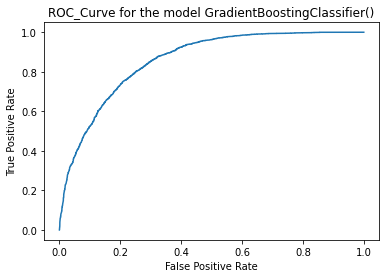

ROC AUC SCORE is- 0.7738033506623145


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier() is 0.7761642934348418


At the K-Fold 3 the CV score of model GradientBoostingClassifier() is 0.7758588279524413




In [123]:
model(grd,x,y)

### Hyper Parameter Tuning
##### To make the model more accurate by providing their best parameters

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
#defining all the parameters of the respective models
Parameter_neighbor={'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
Parameter_dtc={'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'max_features':["auto", "sqrt", "log2"]}
Parameter_rfc={'criterion' : ["gini", "entropy", "log_loss"],'max_features':["sqrt", "log2", None],'class_weight':["balanced", "balanced_subsample"]}
Parameter_ad={'algorithm':['SAMME', 'SAMME.R']}
Parameter_grd={'loss':['log_loss', 'deviance', 'exponential'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}

In [126]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x,y)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}')

In [211]:
HPT(neighbor,Parameter_neighbor)

The best Parameters of the model KNeighborsClassifier() is {'algorithm': 'auto', 'weights': 'distance'}


In [212]:
HPT(dtc,Parameter_dtc)

The best Parameters of the model DecisionTreeClassifier() is {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}


In [213]:
HPT(rfc,Parameter_rfc)

The best Parameters of the model RandomForestClassifier() is {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'log2'}


In [214]:
HPT(ad,Parameter_ad)

The best Parameters of the model AdaBoostClassifier() is {'algorithm': 'SAMME.R'}


In [215]:
HPT(grd,Parameter_grd)

The best Parameters of the model GradientBoostingClassifier() is {'criterion': 'squared_error', 'loss': 'log_loss', 'max_features': 'log2'}


In [127]:
#Redefining the models after getting the parameters
lr=LogisticRegression()
gb=GaussianNB()
neighbor=KNeighborsClassifier(algorithm='auto',weights='distance')
dtc=DecisionTreeClassifier(criterion='entropy',max_features='auto',splitter='best')
rfc=RandomForestClassifier(class_weight= 'balanced_subsample',criterion='gini',max_features='log2')
ad=AdaBoostClassifier(algorithm= 'SAMME.R')
grd=GradientBoostingClassifier(criterion='squared_error',loss= 'log_loss',max_features= 'log2')

For model LogisticRegression()
Training_Accuracy_Score= 0.7390589202843212
Testing_Accuracy_Score= 0.7361372180451128

 Classification Report-
               precision    recall  f1-score   support

           0       0.76      0.68      0.72      4220
           1       0.72      0.79      0.75      4292

    accuracy                           0.74      8512
   macro avg       0.74      0.74      0.74      8512
weighted avg       0.74      0.74      0.74      8512


 Confusion Metrix-
 [[2880 1340]
 [ 906 3386]]


AUC_ROC CURVE


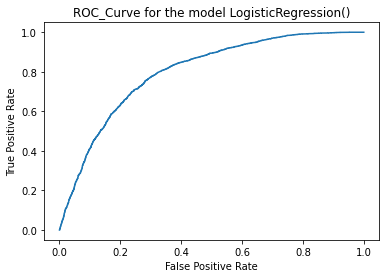

ROC AUC SCORE is- 0.735687027115365


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model LogisticRegression() is 0.7385920390995817


At the K-Fold 3 the CV score of model LogisticRegression() is 0.7387330231683821




In [128]:
model(lr,x,y)

For model GaussianNB()
Training_Accuracy_Score= 0.7241085590084004
Testing_Accuracy_Score= 0.7221569548872181

 Classification Report-
               precision    recall  f1-score   support

           0       0.75      0.65      0.70      4220
           1       0.70      0.79      0.74      4292

    accuracy                           0.72      8512
   macro avg       0.73      0.72      0.72      8512
weighted avg       0.73      0.72      0.72      8512


 Confusion Metrix-
 [[2762 1458]
 [ 907 3385]]


AUC_ROC CURVE


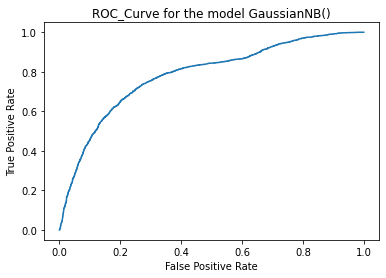

ROC AUC SCORE is- 0.7215894886551857


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GaussianNB() is 0.7237417171859579


At the K-Fold 3 the CV score of model GaussianNB() is 0.7234832463931576




In [129]:
model(gb,x,y)

For model KNeighborsClassifier(weights='distance')
Training_Accuracy_Score= 0.9767960993949363
Testing_Accuracy_Score= 0.8395206766917294

 Classification Report-
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      4220
           1       0.81      0.89      0.85      4292

    accuracy                           0.84      8512
   macro avg       0.84      0.84      0.84      8512
weighted avg       0.84      0.84      0.84      8512


 Confusion Metrix-
 [[3313  907]
 [ 459 3833]]


AUC_ROC CURVE


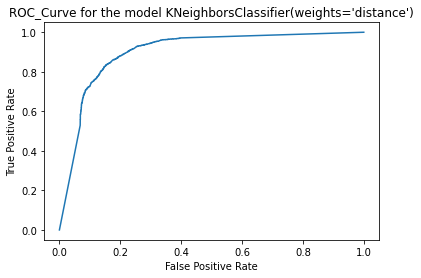

ROC AUC SCORE is- 0.8390639700003976


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier(weights='distance') is 0.8353541049861366


At the K-Fold 3 the CV score of model KNeighborsClassifier(weights='distance') is 0.8451994924573523




In [130]:
model(neighbor,x,y)

For model DecisionTreeClassifier(criterion='entropy', max_features='auto')
Training_Accuracy_Score= 0.9780590965164777
Testing_Accuracy_Score= 0.8009868421052632

 Classification Report-
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      4220
           1       0.80      0.80      0.80      4292

    accuracy                           0.80      8512
   macro avg       0.80      0.80      0.80      8512
weighted avg       0.80      0.80      0.80      8512


 Confusion Metrix-
 [[3381  839]
 [ 855 3437]]


AUC_ROC CURVE


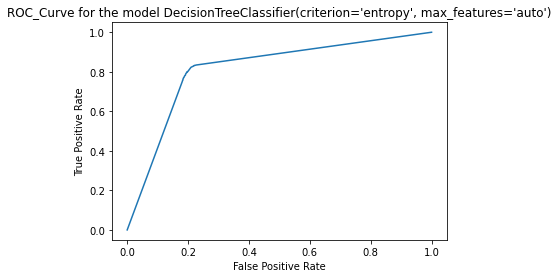

ROC AUC SCORE is- 0.8009885028025248


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='auto') is 0.7899102401428639


At the K-Fold 3 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='auto') is 0.8016589125428827




In [131]:
model(dtc,x,y)

For model RandomForestClassifier(class_weight='balanced_subsample', max_features='log2')
Training_Accuracy_Score= 0.9780590965164777
Testing_Accuracy_Score= 0.8489191729323309

 Classification Report-
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      4220
           1       0.84      0.87      0.85      4292

    accuracy                           0.85      8512
   macro avg       0.85      0.85      0.85      8512
weighted avg       0.85      0.85      0.85      8512


 Confusion Metrix-
 [[3485  735]
 [ 551 3741]]


AUC_ROC CURVE


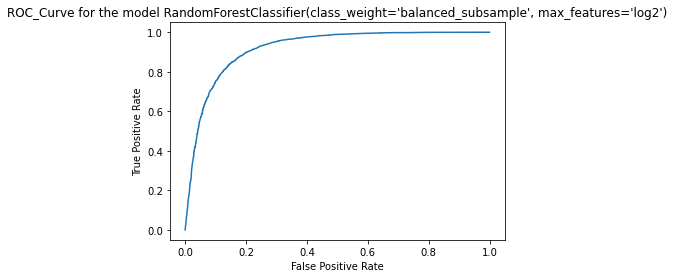

ROC AUC SCORE is- 0.8487255027539388


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier(class_weight='balanced_subsample', max_features='log2') is 0.8389257013957423


At the K-Fold 3 the CV score of model RandomForestClassifier(class_weight='balanced_subsample', max_features='log2') is 0.8483716340053574




In [132]:
model(rfc,x,y)

For model AdaBoostClassifier()
Training_Accuracy_Score= 0.7553897667861129
Testing_Accuracy_Score= 0.7488251879699248

 Classification Report-
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      4220
           1       0.74      0.78      0.76      4292

    accuracy                           0.75      8512
   macro avg       0.75      0.75      0.75      8512
weighted avg       0.75      0.75      0.75      8512


 Confusion Metrix-
 [[3020 1200]
 [ 938 3354]]


AUC_ROC CURVE


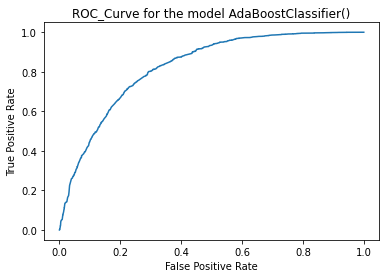

ROC AUC SCORE is- 0.7485468390436522


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.750552187602801


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.7533953663236055




In [133]:
model(ad,x,y)

For model GradientBoostingClassifier(criterion='squared_error', max_features='log2')
Training_Accuracy_Score= 0.781325265816836
Testing_Accuracy_Score= 0.774671052631579

 Classification Report-
               precision    recall  f1-score   support

           0       0.80      0.73      0.76      4220
           1       0.75      0.82      0.79      4292

    accuracy                           0.77      8512
   macro avg       0.78      0.77      0.77      8512
weighted avg       0.78      0.77      0.77      8512


 Confusion Metrix-
 [[3068 1152]
 [ 766 3526]]


AUC_ROC CURVE


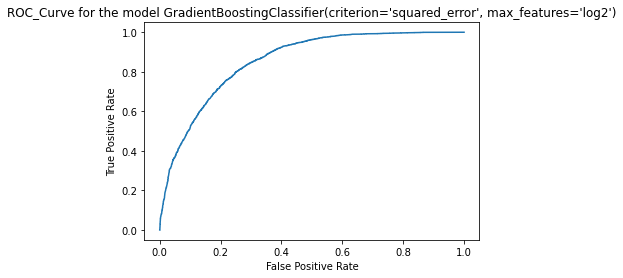

ROC AUC SCORE is- 0.7742713214930897


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier(criterion='squared_error', max_features='log2') is 0.7728276704732364


At the K-Fold 3 the CV score of model GradientBoostingClassifier(criterion='squared_error', max_features='log2') is 0.7760468067108417




In [134]:
model(grd,x,y)

##### RandomForestClassification model seems perfect as compare to other models as the training accuracy is almost 100% while testing accuracy and CV score is 85% which is good enough.Also the CV score and testing accuracy are same it's also indicates that our model is performing excellent by each method either random_state or K-Fold method.The F1-score is 85 % too it means that error are on lower side and ROC_AUC_SCORE is 0.85,which is greater than the threshold value of 0.6, which indicates that the machine probability is good while predicting 1 as 1 and 0 as 0.

### Saving the Best Model

In [135]:
import joblib

In [136]:
file='Census.obj'
joblib.dump(rfc,file)

['Census.obj']

### Loading the Modle

In [137]:
a=joblib.load('Census.obj')
a

RandomForestClassifier(class_weight='balanced_subsample', max_features='log2')

In [138]:
#making prediction
pred=a.predict(x_test)
pred

array([0, 0, 0, ..., 0, 1, 1])

In [139]:
#Testing Accuracy of RandomForestClassifier
Accuracy_score=accuracy_score(pred,y_test)
Accuracy_score

0.9542998120300752

### Plotting ROC_AUC_CURVE


The ROC AUC Score is= 0.9542563793228238


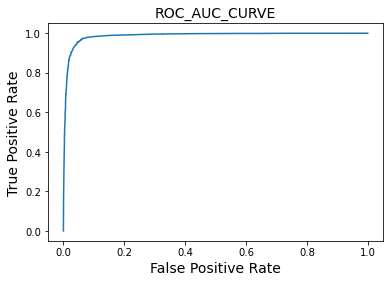

In [140]:
prob=a.predict_proba(x_test)[:,1]
FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC_AUC_CURVE',fontsize=14)
print(f'\nThe ROC AUC Score is= {roc_auc_score(y_test,pred)}')

### Conclusion

In [141]:
conclusion=pd.DataFrame(data=([pred,y_test]),index=['Predicted Income','Original Income'])
conclusion

0     1     2     3     4     5     6     7     8     9     \
Predicted Income     0     0     0     1     0     1     1     1     0     0   
Original Income      0     0     0     1     0     1     1     1     0     0   

                  ...  8502  8503  8504  8505  8506  8507  8508  8509  8510  \
Predicted Income  ...     1     0     1     0     0     1     1     0     1   
Original Income   ...     1     0     1     0     0     1     1     0     0   

                  8511  
Predicted Income     1  
Original Income      1  

[2 rows x 8512 columns]

##### When I deployed our RandomForestClassifier model to the y_test data what i found is that the testing accuracy of the model went to 95% which is excellent accuracy for predicting any target variable correctly.Also the ROC AUC Score is 0.95 which is greater than 0.6 of threshold value and it indicates that out of 100 times,95 times model is predicting the right classes and it is still a great accuracy. As we can see in the conclusion portion we have got almost same value in prediction column as compare to original income. So we can say that this model has great accuracy in predicting the income 